# Week 12 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [5]:
no_games = 12

## Functions

In [6]:
def per_week_stats(dataframe, column1, column2):
    """
    This function creates a column for per week average stats.
    
    Parameters:
        dataframe: the dataframe you want to add to
        column1: the statistic you want to average over the number of games
        column2: the games column to average with
        
    Returns:
        new column with averaged stats across the number of games an individual has played
    
    """
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [7]:
def print_metric(dataframe, metric, player_inx):
    """
    This function prints a stat for a player and the average for the stat across all the players listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        player_idx: the index number for the player in the dataframe
        
    Returns:
        printed stats for the average and a given player for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [8]:
def print_metric_team(dataframe, metric, team_inx):
    """
    This function prints a stat for a team and the average for the stat across all teams listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        team_idx: the index number for the team in the dataframe
        
    Returns:
        printed stats for the average and a team for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [9]:
def bar_plot(x, y, metric, x_label, y_label):
    """
    This function plots a stat on a bar graph for a group of players or teams determined in the x & y.
    
    Parameters:
        x: list of players/teams
        y: values of a given metric
        metric: the stat in question
        x_label: label for the x axis
        y_label: label for the y axis
        
    Returns:
        bar graph
    """
    
    plt.figure(figsize = (8, 4))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

In [10]:
def scale_data(dataframe, column_list):
    """
    This function scales data so they can be easily compared.
    
    Parameters:
        dataframe: dataframe you want to scale
        column_list: list of columns that will be passed through and scaled
        
    Returns:
        scaled columns in the dataframe
    """
    for column in column_list:
        dataframe[column] = scaler.fit_transform(dataframe[[column]])

## Read in DataFrames

In [11]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')
kicking_df = pd.read_pickle('kicking')

In [12]:
print(offense.shape)
offense.head()

(590, 41)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12
0,Dalvin Cook,MIN,RB,25,10,10,0,0,0,0,0,219,1130,6.60,13,34,29,255,15.90,1,4,3,14,3,0,237.00,1,1,222.50,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,37.20,11.20,20.00,6.20
1,Derrick Henry,TEN,RB,26,11,11,0,0,0,0,0,256,1257,13.10,12,26,14,93,12.40,0,0,0,12,0,0,214.00,2,2,207.00,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,19.20,36.50
2,Tyreek Hill,KAN,WR,26,11,11,0,0,0,0,0,10,60,6.00,1,101,68,1021,15.10,13,1,0,14,0,0,226.10,1,3,192.10,10.60,16.80,16.20,12.40,15.30,2.50,11.50,21.80,24.10,0.00,16.00,44.90
3,Alvin Kamara,NOR,RB,25,11,6,0,0,0,0,0,128,585,9.70,8,83,68,646,14.00,4,1,0,12,0,0,229.10,3,4,195.10,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,10.90,27.80,10.50,5.20
4,Kyler Murray,ARI,QB,23,11,11,264,387,2814,19,9,97,650,13.00,10,0,0,0,0.00,0,4,2,10,0,0,300.60,1,5,300.50,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,30.90,20.30,8.90


In [13]:
print(defense.shape)
defense.head()

(32, 36)


,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12
0,Pittsburgh Steelers,11,188,670,4.90,3288,266,1163,4.40,6,363,5.30,198,12.10,2125,16,27,15,55.60,23,16,7,41,124.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00
1,Miami Dolphins,11,205,710,5.70,4066,300,1429,4.80,13,385,6.40,240,11.90,2637,13,35,21,60.00,19,11,8,25,102.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,5.00,14.00
2,Baltimore Ravens,11,214,709,5.20,3664,273,1228,4.50,8,409,5.60,268,9.90,2436,15,30,19,63.30,17,6,11,27,106.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,3.00,8.00
3,Los Angeles Rams,11,215,695,4.70,3264,265,1025,3.90,9,396,5.20,251,9.80,2239,11,30,19,63.30,18,11,7,34,91.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00
4,New Orleans Saints,11,225,651,4.80,3134,255,843,3.30,5,363,5.80,226,11.10,2291,20,29,21,72.40,18,13,5,33,91.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,16.00,14.00,16.00,14.00


In [14]:
defense['Ttl_Turnovers'] = defense['Interceptions'] + defense['Fumbles']
per_week_stats(defense, 'Ttl_Pts_Allowed', 'GP')
per_week_stats(defense, 'Ttl_Yds', 'GP')
per_week_stats(defense, 'Rushing_Att', 'GP')
per_week_stats(defense, 'Rushing_Yds', 'GP')
per_week_stats(defense, 'Rushing_TDs', 'GP')
per_week_stats(defense, 'Passing_Att', 'GP')
per_week_stats(defense, 'Completions', 'GP')
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week_stats(defense, 'Passing_Yds', 'GP')
per_week_stats(defense, 'Passing_TDs', 'GP')
defense['Ttl_TDs_pG'] = defense['Rushing_TDs_pG'] + defense['Passing_TDs_pG']
per_week_stats(defense, 'Ttl_Turnovers', 'GP')
per_week_stats(defense, 'Fumbles', 'GP')
per_week_stats(defense, 'Sacks', 'GP')
per_week_stats(defense, 'TTL', 'GP')

In [15]:
defense.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
0,Pittsburgh Steelers,11,188,670,4.90,3288,266,1163,4.40,6,363,5.30,198,12.10,2125,16,27,15,55.60,23,16,7,41,124.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,17.09,298.91,24.18,105.73,0.55,33.00,18.00,0.55,193.18,1.45,2.00,2.09,0.64,3.73,11.27
1,Miami Dolphins,11,205,710,5.70,4066,300,1429,4.80,13,385,6.40,240,11.90,2637,13,35,21,60.00,19,11,8,25,102.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,5.00,14.00,18.64,369.64,27.27,129.91,1.18,35.00,21.82,0.62,239.73,1.18,2.36,1.73,0.73,2.27,9.27
2,Baltimore Ravens,11,214,709,5.20,3664,273,1228,4.50,8,409,5.60,268,9.90,2436,15,30,19,63.30,17,6,11,27,106.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,3.00,8.00,19.45,333.09,24.82,111.64,0.73,37.18,24.36,0.66,221.45,1.36,2.09,1.55,1.00,2.45,9.64
3,Los Angeles Rams,11,215,695,4.70,3264,265,1025,3.90,9,396,5.20,251,9.80,2239,11,30,19,63.30,18,11,7,34,91.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,19.55,296.73,24.09,93.18,0.82,36.00,22.82,0.63,203.55,1.00,1.82,1.64,0.64,3.09,8.27
4,New Orleans Saints,11,225,651,4.80,3134,255,843,3.30,5,363,5.80,226,11.10,2291,20,29,21,72.40,18,13,5,33,91.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,16.00,14.00,16.00,14.00,20.45,284.91,23.18,76.64,0.45,33.00,20.55,0.62,208.27,1.82,2.27,1.64,0.45,3.00,8.27


In [17]:
offense[offense['Player'] == "Wayne Gallman"]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12
107,Wayne Gallman,NYG,RB,26,10,5,0,0,0,0,0,93,369,12.70,6,21,16,72,9.00,0,0,0,6,0,0,88.10,30,,80.10,1.40,0.00,1.40,4.50,2.40,0.00,11.40,12.20,13.70,18.00,0.00,15.10


In [18]:
taken_wrt = ['Davante Adams', 'Keenan Allen', 'Mark Andrews', 'Kalen Ballage', 'Odell Beckham Jr.', 
             'A.J. Brown', 'Antonio Brown', 'John Brown', 'DJ Chark', 'Nick Chubb', 'Chase Claypool', 
             'James Conner', 'Dalvin Cook', 'Jared Cook', 'Amari Cooper', 'Mike Davis', 'Stefon Diggs', 
             'Chase Edmonds', 'Clyde Edwards-Helaire', 'Austin Ekeler', 'Ezekiel Elliott', 'Evan Engram', 
             'Zach Ertz', 'Mike Evans', 'Noah Fant', 'Leonard Fournette', 'Travis Fulgham', 'Will Fuller', 
             'Wayne Gallman', 'Mike Gesicki', 'Antonio Gibson', 'Chris Godwin', 'Kenny Golladay', 'Melvin Gordon', 
             'Todd Gurley', 'Damien Harris', 'Hunter Henry', 'Tyreek Hill', 'T.Y. Hilton', 'T.J. Hockenson', 
             'Jordan Howard', 'Kareem Hunt', 'Hayden Hurst', 'Josh Jacobs', 'Justin Jefferson', 
             'David Johnson', 'Diontae Johnson', 'Aaron Jones', 'Ronald Jones II', 'Alvin Kamara', 
             'Travis Kelce', 'George Kittle', 'Cooper Kupp', 'Phillip Lindsay', 'Tyler Lockett', 
             'Christian McCaffrey', 'Terry McLaurin', 'D.K. Metcalf', 'Joe Mixon',
             'David Montgomery', 'D.J. Moore', 'Zack Moss', 'DeVante Parker', 'Calvin Ridley', 
             'James Robinson', 'Allen Robinson', 'Curtis Samuel', 'Miles Sanders', 
             'Darius Slayton', 'JuJu Smith-Schuster', 'Adam Thielen', 'Michael Thomas', 'Robert Tonyan', 
             'Darren Waller', 'Robert Woods']


In [19]:
taken_qbs = ['Josh Allen', 'Tom Brady', 'Drew Brees', 'Joe Burrow', 'Lamar Jackson', 'Daniel Jones', 
             'Patrick Mahomes', 'Kyler Murray', 'Cam Newton', 'Ben Roethlisberger', 'Matt Ryan', 
             'Ryan Tannehill', 'Deshaun Watson', 'Russell Wilson']

In [20]:
taken_k = ['Rodrigo Blankenship', 'Harrison Butker', 'Jake Elliot', "Ka'imi Fairbairn",  
           'Wil Lutz', 'Jason Meyers', 'Joey Slye', 'Justin Tucker', 'Greg Zuerlein']

In [22]:
myteam_wrt = ['Robby Anderson', 'Tyler Boyd', 'Chris Carson', 'Brandin Cooks',
              'Rob Gronkowski', 'Derrick Henry', 'DeAndre Hopkins', 'Kerryon Johnson',
              'Julio Jones', 'Jonnu Smith', "D'Andre Swift"]


## QB Analysis

In [21]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11
2,Kyler Murray,ARI,QB,23,10,10,241,353,2644,19,8,92,619,13.30,10,0,0,0,0.00,0,4,2,10,0,0,291.70,1,3,291.60,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,30.90,20.30
4,Patrick Mahomes,KAN,QB,25,10,10,254,374,3035,27,2,39,187,11.90,2,0,0,0,0.00,0,1,0,2,0,2,262.10,2,5,262.00,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90,0.00,22.50
5,Russell Wilson,SEA,QB,32,10,10,256,362,2986,30,10,55,367,12.70,1,0,0,0,0.00,0,6,3,1,0,1,268.10,3,6,268.10,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10,11.90,20.10
8,Josh Allen,BUF,QB,24,10,10,249,364,2871,21,7,72,279,11.80,5,1,1,12,12.00,1,4,4,6,0,0,249.40,4,9,249.00,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00,28.40,0.00
13,Aaron Rodgers,GNB,QB,37,10,10,240,352,2889,29,4,17,78,9.90,1,1,1,-6,-6.00,0,2,2,1,0,0,237.30,5,14,236.70,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70


In [22]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'Interceptions', 'Games')
per_week_stats(quarterbacks, 'LostFumbles', 'Games')
quarterbacks['Ttl_Turnovers_pG'] = quarterbacks['Interceptions_pG'] + quarterbacks['LostFumbles_pG']
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [23]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
2,Kyler Murray,ARI,QB,23,10,10,241,353,2644,19,8,92,619,13.30,10,0,0,0,0.00,0,4,2,10,0,0,291.70,1,3,291.60,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,30.90,20.30,24.10,35.30,0.68,264.40,1.90,7.49,0.80,0.20,1.00,61.90,29.16
4,Patrick Mahomes,KAN,QB,25,10,10,254,374,3035,27,2,39,187,11.90,2,0,0,0,0.00,0,1,0,2,0,2,262.10,2,5,262.00,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90,0.00,22.50,25.40,37.40,0.68,303.50,2.70,8.11,0.20,0.00,0.20,18.70,26.20
5,Russell Wilson,SEA,QB,32,10,10,256,362,2986,30,10,55,367,12.70,1,0,0,0,0.00,0,6,3,1,0,1,268.10,3,6,268.10,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10,11.90,20.10,25.60,36.20,0.71,298.60,3.00,8.25,1.00,0.30,1.30,36.70,26.81
8,Josh Allen,BUF,QB,24,10,10,249,364,2871,21,7,72,279,11.80,5,1,1,12,12.00,1,4,4,6,0,0,249.40,4,9,249.00,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00,28.40,0.00,24.90,36.40,0.68,287.10,2.10,7.89,0.70,0.40,1.10,27.90,24.90
13,Aaron Rodgers,GNB,QB,37,10,10,240,352,2889,29,4,17,78,9.90,1,1,1,-6,-6.00,0,2,2,1,0,0,237.30,5,14,236.70,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,24.00,35.20,0.68,288.90,2.90,8.21,0.40,0.20,0.60,7.80,23.67


In [24]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
count,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,64.00,67.00,67.00,64.00,67.00,67.00,67.00,67.00,67.00
mean,28.51,6.13,4.87,111.04,169.09,1232.39,8.19,3.81,19.54,85.40,7.03,1.12,0.27,0.22,1.60,0.72,0.04,2.30,1.00,1.16,0.04,0.37,92.94,92.83,9.30,9.75,9.49,9.06,7.87,7.82,8.65,7.34,9.16,7.09,7.31,14.68,22.85,0.63,161.40,1.00,6.64,0.57,0.14,0.71,10.47,11.63
std,5.12,3.44,4.29,100.29,149.26,1126.79,8.90,3.52,22.54,132.59,4.77,1.93,1.02,0.79,9.44,3.43,0.21,2.40,1.34,2.00,0.21,0.83,90.27,90.24,10.57,11.95,11.08,10.93,10.27,10.51,11.98,9.46,11.56,9.59,9.63,9.56,14.25,0.15,108.13,0.87,1.94,0.47,0.20,0.53,13.61,8.65
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-7.00,-2.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2.50,0.00
25%,24.00,3.00,0.00,9.50,18.00,109.00,0.00,0.00,5.00,1.50,3.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.15,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.25,10.75,0.59,54.00,0.00,5.88,0.00,0.00,0.25,0.35,3.15
50%,27.00,6.00,4.00,88.00,134.00,918.00,4.00,3.00,12.00,25.00,7.20,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,57.80,57.70,0.30,0.80,1.10,1.40,0.70,0.00,0.10,0.10,0.10,0.10,0.30,17.50,27.50,0.65,185.00,1.00,6.88,0.67,0.00,0.80,6.22,11.57
75%,32.00,10.00,10.00,217.50,322.00,2409.00,15.00,6.50,27.50,123.00,10.75,1.50,0.00,0.00,0.00,0.00,0.00,4.00,2.00,1.50,0.00,0.50,175.20,175.05,19.35,17.90,17.90,19.55,14.85,16.00,17.10,16.05,21.10,12.35,15.90,23.55,35.25,0.68,249.75,1.55,7.68,0.83,0.24,1.00,18.01,18.47
max,43.00,11.00,11.00,280.00,433.00,3035.00,30.00,14.00,103.00,619.00,19.00,10.00,8.00,6.00,74.00,16.00,1.00,10.00,5.00,10.00,1.00,5.00,291.70,291.60,31.80,39.80,40.00,38.30,30.70,32.00,38.50,36.60,37.90,31.80,31.40,30.20,44.40,1.00,371.20,3.00,13.50,2.00,1.00,2.00,61.90,29.16


In [25]:
quarterbacks[quarterbacks['Player'].isin(['Aaron Rodgers', 'Justin Herbert'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
13,Aaron Rodgers,GNB,QB,37,10,10,240,352,2889,29,4,17,78,9.90,1,1,1,-6,-6.00,0,2,2,1,0,0,237.30,5,14,236.70,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,24.00,35.20,0.68,288.90,2.90,8.21,0.40,0.20,0.60,7.80,23.67
20,Justin Herbert,LAC,QB,22,9,9,238,350,2699,22,6,39,187,11.90,3,0,0,0,0.00,0,4,1,3,0,0,224.70,7,21,224.60,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,21.50,27.70,26.44,38.89,0.68,299.89,2.44,7.71,0.67,0.11,0.78,20.78,24.96


In [26]:
available_qbs = quarterbacks[~quarterbacks['Player'].isin(taken_qbs)]
available_qbs = available_qbs[available_qbs['Player'] != 'Dak Prescott']
available_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
13,Aaron Rodgers,GNB,QB,37,10,10,240,352,2889,29,4,17,78,9.90,1,1,1,-6,-6.00,0,2,2,1,0,0,237.30,5,14,236.70,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,24.00,35.20,0.68,288.90,2.90,8.21,0.40,0.20,0.60,7.80,23.67
20,Justin Herbert,LAC,QB,22,9,9,238,350,2699,22,6,39,187,11.90,3,0,0,0,0.00,0,4,1,3,0,0,224.70,7,21,224.60,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,21.50,27.70,26.44,38.89,0.68,299.89,2.44,7.71,0.67,0.11,0.78,20.78,24.96
78,Teddy Bridgewater,CAR,QB,28,10,10,238,330,2552,13,7,35,196,11.00,3,0,0,0,0.00,0,1,1,3,0,1,184.70,13,,184.60,19.40,10.70,14.60,27.20,20.80,11.40,19.20,13.00,28.30,20.00,0.00,23.80,33.00,0.72,255.20,1.30,7.73,0.70,0.10,0.80,19.60,18.46
79,Carson Wentz,PHI,QB,28,10,10,220,377,2326,14,14,44,216,13.10,5,0,0,0,0.00,0,10,4,5,0,5,188.60,14,,188.60,15.00,14.40,23.50,22.40,19.40,29.40,28.80,10.60,0.00,8.70,16.40,22.00,37.70,0.58,232.60,1.40,6.17,1.40,0.40,1.80,21.60,18.86
80,Joe Burrow,CIN,QB,24,10,10,264,404,2688,13,5,37,142,11.40,3,0,0,0,0.00,0,9,4,3,0,0,178.70,15,,178.60,17.30,24.50,20.40,16.10,5.30,17.70,34.60,18.90,0.00,12.50,11.30,26.40,40.40,0.65,268.80,1.30,6.65,0.50,0.40,0.90,14.20,17.86


In [27]:
scaled_qbs = available_qbs[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'CompletedPasses_pG', 
                            'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt',
                            'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG', 'TTL_pG']]

qb_columns = ['CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 
               'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG']

scale_data(scaled_qbs, qb_columns)

scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
13,Aaron Rodgers,GNB,QB,37,10,10,1.31,1.14,0.37,1.56,2.94,8.21,-0.30,0.37,0.06,23.67
20,Justin Herbert,LAC,QB,22,9,9,1.58,1.40,0.36,1.67,2.32,7.71,0.23,-0.06,1.49,24.96
78,Teddy Bridgewater,CAR,QB,28,10,10,1.29,0.98,0.61,1.23,0.77,7.73,0.29,-0.12,1.36,18.46
79,Carson Wentz,PHI,QB,28,10,10,1.09,1.32,-0.22,1.00,0.90,6.17,1.68,1.34,1.59,18.86
80,Joe Burrow,CIN,QB,24,10,10,1.58,1.51,0.20,1.36,0.77,6.65,-0.10,1.34,0.77,17.86


In [28]:
scaled_qbs['Combined_Score'] = (scaled_qbs['CompletedPasses_pG'] + scaled_qbs['PassesAttempted_pG'] + 
                                scaled_qbs['Completion_Percent'] + scaled_qbs['PassingYds_pG'] + 
                                scaled_qbs['PassingTDs_pG'] + scaled_qbs['Yds_pAtt'] +
                                scaled_qbs['RushingYds_pG'] + scaled_qbs['TTL_pG'] -
                                scaled_qbs['Interceptions_pG'] - scaled_qbs['LostFumbles_pG'])

In [29]:
scaled_qbs.sort_values('Combined_Score', ascending=False, inplace=True)

In [30]:
scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG,Combined_Score
20,Justin Herbert,LAC,QB,22,9,9,1.58,1.40,0.36,1.67,2.32,7.71,0.23,-0.06,1.49,24.96,41.34
13,Aaron Rodgers,GNB,QB,37,10,10,1.31,1.14,0.37,1.56,2.94,8.21,-0.30,0.37,0.06,23.67,39.19
78,Teddy Bridgewater,CAR,QB,28,10,10,1.29,0.98,0.61,1.23,0.77,7.73,0.29,-0.12,1.36,18.46,32.25
83,Cam Newton,NWE,QB,31,9,9,0.73,0.59,0.37,0.79,-0.40,7.66,0.45,-0.06,3.39,19.42,32.16
90,Gardner Minshew II,JAX,QB,24,7,7,1.44,1.35,0.23,1.33,1.52,6.95,0.32,1.48,1.12,19.33,31.47


In [31]:
qb1 = 13
qb2 = 20

Week 12 match ups:
    
    Green Bay vs Chicago Bears
    Los Angeles Chargers vs Buffalo Bills

In [32]:
qb_opp = ['Chicago Bears', 'Buffalo Bills']
defense[defense['Team'].isin(qb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
5,Chicago Bears,10,209,658,5.20,3401,287,1151,4.00,6,350,6.10,214,11.10,2250,12,34,15,44.10,11,6,5,21,64.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,4.00,12.00,0.00,20.90,340.10,28.70,115.10,0.60,35.00,21.40,0.61,225.00,1.20,1.80,1.10,0.50,2.10,6.40
18,Buffalo Bills,10,265,640,5.80,3737,280,1350,4.80,15,333,6.60,226,11.20,2387,15,40,25,62.50,16,7,9,27,56.00,8.00,2.00,5.00,6.00,-4.00,3.00,14.00,4.00,12.00,6.00,0.00,26.50,373.70,28.00,135.00,1.50,33.30,22.60,0.68,238.70,1.50,3.00,1.60,0.90,2.70,5.60


In [33]:
def1 = 5
def2 = 18

### Quarterback Comparisons

Quarterbacks

Avg PassingYds_pG: 161.4
Aaron Rodgers PassingYds_pG: 288.9
--------------------------------------------------
Avg PassingYds_pG: 161.4
Justin Herbert PassingYds_pG: 299.89
--------------------------------------------------


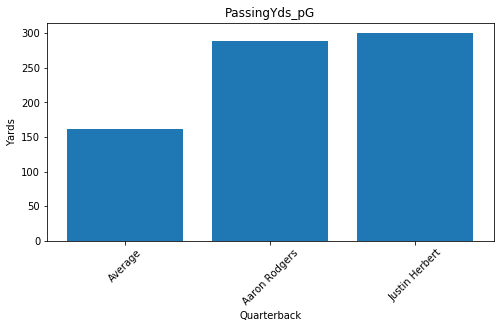

----------------------------------------
Defense

Avg Passing_Yds_pG: 242.79
Chicago Bears Passing_Yds_pG: 225.0
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
Buffalo Bills Passing_Yds_pG: 238.7
--------------------------------------------------


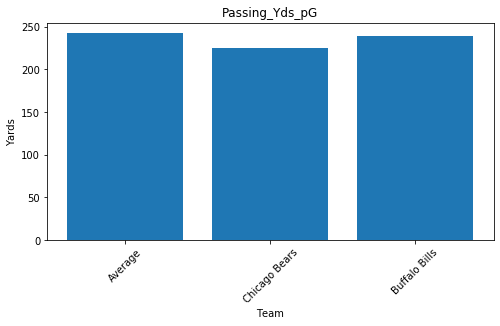

In [34]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Quarterbacks

Avg PassesAttempted_pG: 22.85
Aaron Rodgers PassesAttempted_pG: 35.2
--------------------------------------------------
Avg PassesAttempted_pG: 22.85
Justin Herbert PassesAttempted_pG: 38.89
--------------------------------------------------


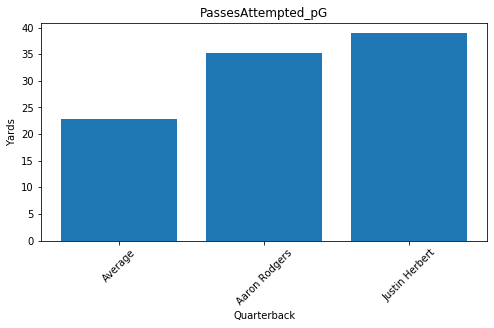

----------------------------------------
Defense

Avg Passing_Att_pG: 35.24
Chicago Bears Passing_Att_pG: 35.0
--------------------------------------------------
Avg Passing_Att_pG: 35.24
Buffalo Bills Passing_Att_pG: 33.3
--------------------------------------------------


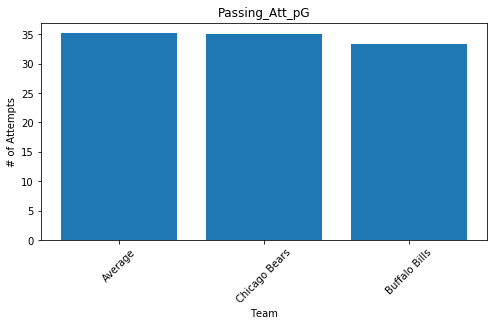

In [35]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassesAttempted_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassesAttempted_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_Att_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Att_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Att_pG', 'Team', '# of Attempts')

Quarterbacks

Avg Completion_Percent: 0.63
Aaron Rodgers Completion_Percent: 0.68
--------------------------------------------------
Avg Completion_Percent: 0.63
Justin Herbert Completion_Percent: 0.67
--------------------------------------------------


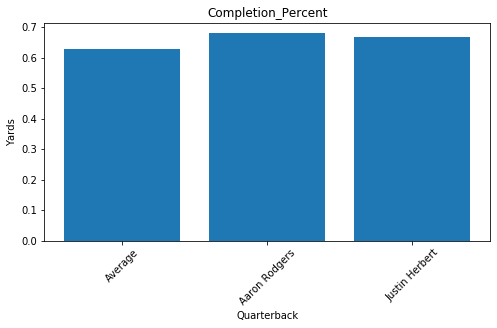

----------------------------------------
Defense

Avg Completion_Percent_Allowed: 0.56
Indianapolis Colts Completion_Percent_Allowed: 0.5
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.56
New York Jets Completion_Percent_Allowed: 0.58
--------------------------------------------------


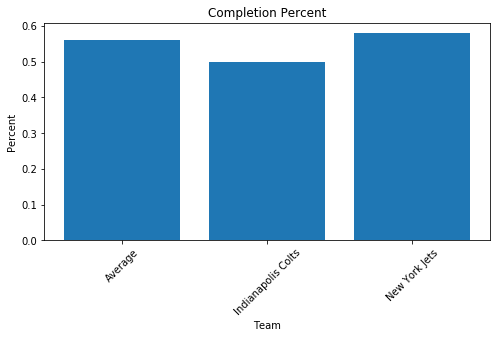

In [150]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Completion_Percent', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Completion_Percent_Allowed', def1)
average, defteam2, team2 = print_metric_team(defense, 'Completion_Percent_Allowed', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Completion Percent', 'Team', 'Percent')

Quarterbacks

Avg RushingYds_pG: 10.47
Aaron Rodgers RushingYds_pG: 7.8
--------------------------------------------------
Avg RushingYds_pG: 10.47
Justin Herbert RushingYds_pG: 20.78
--------------------------------------------------


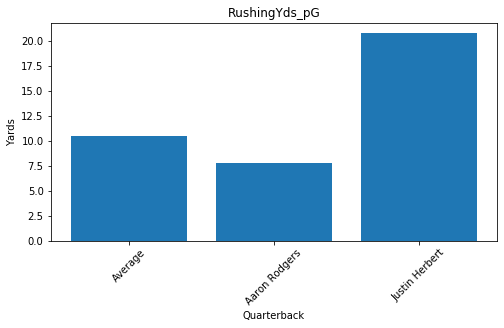

----------------------------------------
Defense

Avg Rushing_Yds_pG: 116.5
Chicago Bears Rushing_Yds_pG: 115.1
--------------------------------------------------
Avg Rushing_Yds_pG: 116.5
Buffalo Bills Rushing_Yds_pG: 135.0
--------------------------------------------------


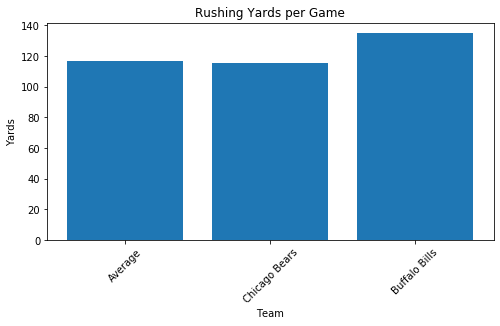

In [37]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'RushingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'RushingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'RushingYds_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Rushing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Rushing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Rushing Yards per Game', 'Team', 'Yards')

Quarterbacks

Avg PassingTDs_pG: 1.0
Aaron Rodgers PassingTDs_pG: 2.9
--------------------------------------------------
Avg PassingTDs_pG: 1.0
Justin Herbert PassingTDs_pG: 2.44
--------------------------------------------------


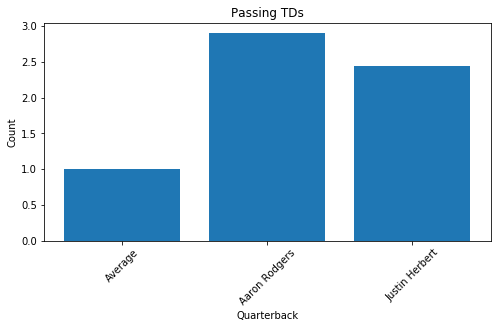

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.72
Chicago Bears Passing_TDs_pG: 1.2
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
Buffalo Bills Passing_TDs_pG: 1.5
--------------------------------------------------


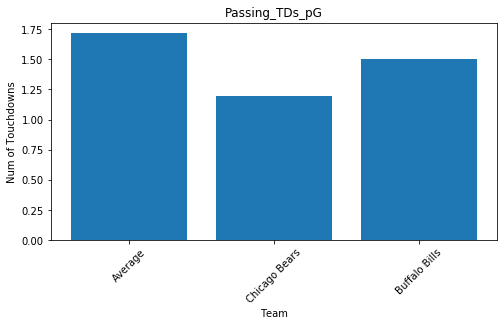

In [38]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassingTDs_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingTDs_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Passing TDs', 'Quarterback', 'Count')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_TDs_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_TDs_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Quarterbacks

Avg Ttl_Turnovers_pG: 0.71
Aaron Rodgers Ttl_Turnovers_pG: 0.6
--------------------------------------------------
Avg Ttl_Turnovers_pG: 0.71
Justin Herbert Ttl_Turnovers_pG: 0.78
--------------------------------------------------


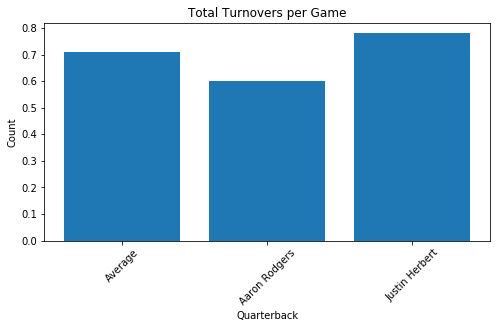

----------------------------------------
Defense

Avg Ttl_Turnovers_pG: 1.29
Chicago Bears Ttl_Turnovers_pG: 1.1
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.29
Buffalo Bills Ttl_Turnovers_pG: 1.6
--------------------------------------------------


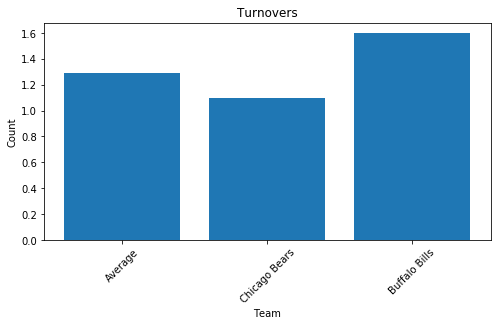

In [39]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'Ttl_Turnovers_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Ttl_Turnovers_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Total Turnovers per Game', 'Quarterback', 'Count')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Ttl_Turnovers_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Turnovers_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Turnovers', 'Team', 'Count')

#### Additional Defense Stats

Avg RZ_Percent: 62.49
Chicago Bears RZ_Percent: 44.1
--------------------------------------------------
Avg RZ_Percent: 62.49
Buffalo Bills RZ_Percent: 62.5
--------------------------------------------------


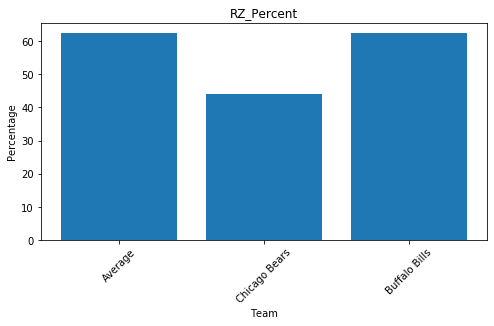

In [40]:
average, defteam1, team1 = print_metric_team(defense, 'RZ_Percent', def1)
average, defteam2, team2 = print_metric_team(defense, 'RZ_Percent', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'RZ_Percent', 'Team', 'Percentage')

Avg Ttl_Pts_Allowed_pG: 24.89
Chicago Bears Ttl_Pts_Allowed_pG: 20.9
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.89
Buffalo Bills Ttl_Pts_Allowed_pG: 26.5
--------------------------------------------------


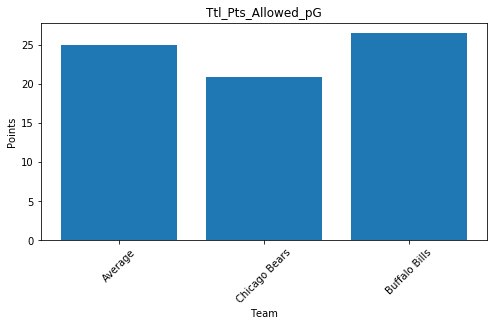

In [41]:
average, defteam1, team1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Avg Sacks_pG: 2.18
Chicago Bears Sacks_pG: 2.1
--------------------------------------------------
Avg Sacks_pG: 2.18
Buffalo Bills Sacks_pG: 2.7
--------------------------------------------------


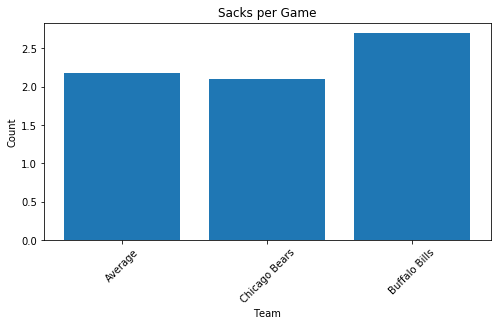

In [42]:
average, defteam1, team1 = print_metric_team(defense, 'Sacks_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Sacks_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Sacks per Game', 'Team', 'Count')



## Runningbacks

In [92]:
runningbacks = offense[offense['Position'] == 'RB']

In [93]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')
per_week_stats(runningbacks, 'RushingTDs', 'Games')
per_week_stats(runningbacks, 'ReceivingTDs', 'Games')
per_week_stats(runningbacks, 'LostFumbles', 'Games')

In [94]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
0,Dalvin Cook,MIN,RB,25,9,9,0,0,0,0,0,201,1069,8.20,13,30,25,234,12.60,1,3,2,14,3,0,228.80,1,1,216.30,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,37.20,11.20,20.00,22.33,118.78,3.33,2.78,1.44,0.11,0.22
1,Alvin Kamara,NOR,RB,25,10,6,0,0,0,0,0,117,531,9.40,8,81,67,648,15.70,4,1,0,12,0,0,223.40,2,2,189.90,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,10.90,27.80,10.50,11.70,53.10,8.10,6.70,0.80,0.40,0.00
3,Derrick Henry,TEN,RB,26,10,10,0,0,0,0,0,229,1079,11.10,9,22,12,86,8.70,0,0,0,9,0,0,176.50,3,4,170.50,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,19.20,22.90,107.90,2.20,1.20,0.90,0.00,0.00
10,Josh Jacobs,LVR,RB,22,10,10,0,0,0,0,0,199,755,10.90,9,31,24,158,11.80,0,1,1,9,0,0,155.30,4,11,143.30,31.90,10.50,6.30,7.30,20.50,0.00,3.10,12.80,12.80,25.60,12.40,19.90,75.50,3.10,2.40,0.90,0.00,0.10
11,James Robinson,JAX,RB,22,10,10,0,0,0,0,0,172,762,8.30,5,41,31,249,8.30,2,2,1,7,1,0,158.60,5,12,143.10,9.00,18.00,24.90,10.70,5.00,11.30,27.70,0.00,15.90,11.20,9.40,17.20,76.20,4.10,3.10,0.50,0.20,0.10


In [95]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
3,Derrick Henry,TEN,RB,26,10,10,0,0,0,0,0,229,1079,11.10,9,22,12,86,8.70,0,0,0,9,0,0,176.50,3,4,170.50,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,19.20,22.90,107.90,2.20,1.20,0.90,0.00,0.00
97,Chris Carson,SEA,RB,26,6,6,0,0,0,0,0,66,323,12.90,3,25,22,147,12.80,3,1,0,6,0,0,94.00,25,,83.00,18.60,16.80,7.60,22.00,13.90,0.00,4.10,0.00,0.00,0.00,0.00,11.00,53.83,4.17,3.67,0.50,0.50,0.00
259,Salvon Ahmed,MIA,RB,22,3,2,0,0,0,0,0,40,166,5.50,1,7,6,36,6.00,0,0,0,1,0,0,29.20,73,,26.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.80,15.00,7.40,13.33,55.33,2.33,2.00,0.33,0.00,0.00


In [96]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [97]:
scaled_rbs = available_rbs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'RushingAttempts_pG', 
                            'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 'ReceivingTDs_pG', 
                            'LostFumbles_pG']]

rb_columns = ['RushingAttempts_pG', 'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 
              'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_rbs, rb_columns)

scaled_rbs.head()

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
3,Derrick Henry,TEN,RB,10,10,4.42,4.74,0.66,0.15,4.52,-0.43,-0.33
46,Kenyan Drake,ARI,RB,9,7,2.85,2.82,0.33,0.28,2.55,-0.43,2.59
49,D'Andre Swift,DET,RB,9,1,0.85,1.02,2.32,2.35,1.92,1.89,-0.33
50,Jonathan Taylor,IND,RB,10,8,2.20,1.81,1.05,1.52,1.66,-0.43,2.30
55,Darrell Henderson,LAR,RB,10,8,1.61,1.66,0.43,0.25,1.66,0.61,-0.33


In [98]:
scaled_rbs['Combined_Score'] = (scaled_rbs['RushingAttempts_pG'] + scaled_rbs['RushingYds_pG'] + 
                                scaled_rbs['Targeted_pG'] + scaled_rbs['Receptions_pG'] + 
                                scaled_rbs['RushingTDs_pG'] + scaled_rbs['ReceivingTDs_pG'] - 
                                scaled_rbs['LostFumbles_pG'])

scaled_rbs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_rbs.head(10)

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
97,Chris Carson,SEA,RB,6,6,1.61,1.91,2.19,2.57,2.23,4.78,-0.33,15.63
3,Derrick Henry,TEN,RB,10,10,4.42,4.74,0.66,0.15,4.52,-0.43,-0.33,14.40
143,Raheem Mostert,SFO,RB,4,4,2.03,3.06,1.28,1.67,0.81,2.18,-0.33,11.35
49,D'Andre Swift,DET,RB,9,1,0.85,1.02,2.32,2.35,1.92,1.89,-0.33,10.67
70,Nyheim Hines,IND,RB,10,1,0.22,0.03,2.45,2.50,0.52,3.74,-0.33,9.79
96,Rex Burkhead,NWE,RB,10,0,0.60,0.53,1.52,1.42,1.09,2.70,-0.33,8.19
118,Myles Gaskin,MIA,RB,7,5,2.39,1.99,2.84,3.17,1.01,-0.43,3.43,7.54
119,Giovani Bernard,CIN,RB,10,4,0.36,0.09,2.14,2.11,0.52,1.65,-0.33,7.21
259,Salvon Ahmed,MIA,RB,3,2,2.16,1.99,0.77,0.94,1.28,-0.43,-0.33,7.04
116,Jamaal Williams,GNB,RB,9,3,1.14,1.05,1.63,1.91,0.01,0.73,-0.33,6.80


In [103]:
rb1 = 97
rb2 = 3
rb3 = 143
rb4 = 49
rb5 = 70
rb6 = 118

Week 12 opponents:
    
    Seattle Seahawks vs Philadelphia Eagles
    Tennessee Titans vs Indianapolis Colts
    San Francisco 49ers vs Los Angeles Rams
    Detroit Lions vs Houston Texans
    Indianapolis Colts vs Tennessee Titans
    Miami Dolphins vs New York Jets

In [100]:
rb_opp = ['Philadelphia Eagles', 'Indianapolis Colts', 'Los Angeles Rams', 'Houston Texans', 
          'Tennessee Titans', 'New York Jets']

defense[defense['Team'].isin(rb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
1,Los Angeles Rams,10,192,625,4.70,2919,232,913,3.90,8,361,5.10,227,9.70,2006,11,29,18,62.10,15,10,5,32,76.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,19.20,291.90,23.20,91.30,0.80,36.10,22.70,0.63,200.60,1.10,1.90,1.50,0.50,3.20,7.60
4,Indianapolis Colts,10,208,598,5.00,2981,252,892,3.50,8,324,6.00,205,11.00,2089,14,29,19,65.50,17,12,5,22,106.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,10.00,8.00,20.80,298.10,25.20,89.20,0.80,32.40,20.50,0.63,208.90,1.40,2.20,1.70,0.50,2.20,10.60
14,Philadelphia Eagles,10,254,677,5.10,3427,315,1334,4.20,15,328,5.80,217,10.80,2093,13,32,21,65.60,11,3,8,34,69.00,3.00,-1.00,8.00,18.00,-1.00,2.00,9.00,20.00,0.00,3.00,8.00,25.40,342.70,31.50,133.40,1.50,32.80,21.70,0.66,209.30,1.30,2.80,1.10,0.80,3.40,6.90
16,Tennessee Titans,10,259,681,5.70,3889,274,1215,4.40,10,395,6.60,265,10.50,2674,21,39,27,69.20,15,10,5,12,43.00,3.00,5.00,7.00,10.00,8.00,-2.00,6.00,-1.00,14.00,1.00,3.00,25.90,388.90,27.40,121.50,1.00,39.50,26.50,0.67,267.40,2.10,3.10,1.50,0.50,1.20,4.30
22,Houston Texans,10,272,672,6.10,4117,315,1593,5.10,13,336,7.10,229,11.60,2524,19,40,24,60.00,5,2,3,21,26.00,0.00,4.00,1.00,2.00,9.00,2.00,-4.00,0.00,4.00,5.00,3.00,27.20,411.70,31.50,159.30,1.30,33.60,22.90,0.68,252.40,1.90,3.20,0.50,0.30,2.10,2.60
30,New York Jets,10,302,676,5.90,4000,293,1117,3.80,12,369,7.50,269,11.00,2883,19,40,21,52.50,11,7,4,14,35.00,7.00,4.00,0.00,8.00,2.00,6.00,5.00,-4.00,-1.00,0.00,8.00,30.20,400.00,29.30,111.70,1.20,36.90,26.90,0.73,288.30,1.90,3.10,1.10,0.40,1.40,3.50


In [101]:
teamRB1 = 14
teamRB2 = 4
teamRB3 = 1
teamRB4 = 22
teamRB5 = 16
teamRB6 = 30

### Running Back Comparison

Running Backs

Avg RushingAttempts_pG: 4.17
Chris Carson RushingAttempts_pG: 11.0
--------------------------------------------------
Avg RushingAttempts_pG: 4.17
Derrick Henry RushingAttempts_pG: 22.9
--------------------------------------------------
Avg RushingAttempts_pG: 4.17
Raheem Mostert RushingAttempts_pG: 12.75
--------------------------------------------------
Avg RushingAttempts_pG: 4.17
D'Andre Swift RushingAttempts_pG: 7.78
--------------------------------------------------
Avg RushingAttempts_pG: 4.17
Nyheim Hines RushingAttempts_pG: 5.1
--------------------------------------------------
Avg RushingAttempts_pG: 4.17
Myles Gaskin RushingAttempts_pG: 14.29
--------------------------------------------------


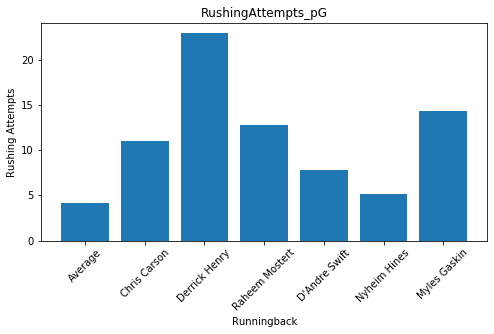

----------------------------------------
Defense

Avg Rushing_Att_pG: 26.98
Philadelphia Eagles Rushing_Att_pG: 31.5
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
Indianapolis Colts Rushing_Att_pG: 25.2
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
Los Angeles Rams Rushing_Att_pG: 23.2
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
Houston Texans Rushing_Att_pG: 31.5
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
Tennessee Titans Rushing_Att_pG: 27.4
--------------------------------------------------
Avg Rushing_Att_pG: 26.98
New York Jets Rushing_Att_pG: 29.3
--------------------------------------------------


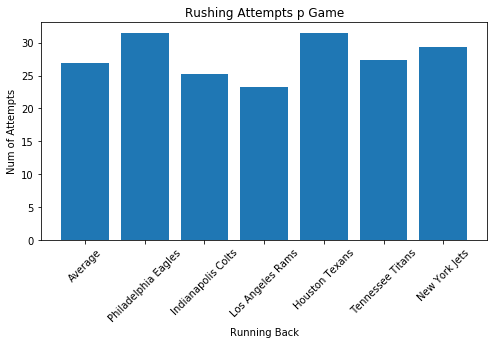

In [104]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingAttempts_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingAttempts_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingAttempts_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingAttempts_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Att_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Att_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Att_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Att_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Attempts p Game', 'Running Back', 'Num of Attempts')

Running Backs

Avg RushingYds_pG: 17.32
Chris Carson RushingYds_pG: 53.83
--------------------------------------------------
Avg RushingYds_pG: 17.32
Derrick Henry RushingYds_pG: 107.9
--------------------------------------------------
Avg RushingYds_pG: 17.32
Raheem Mostert RushingYds_pG: 75.75
--------------------------------------------------
Avg RushingYds_pG: 17.32
D'Andre Swift RushingYds_pG: 36.78
--------------------------------------------------
Avg RushingYds_pG: 17.32
Nyheim Hines RushingYds_pG: 17.9
--------------------------------------------------
Avg RushingYds_pG: 17.32
Myles Gaskin RushingYds_pG: 55.29
--------------------------------------------------


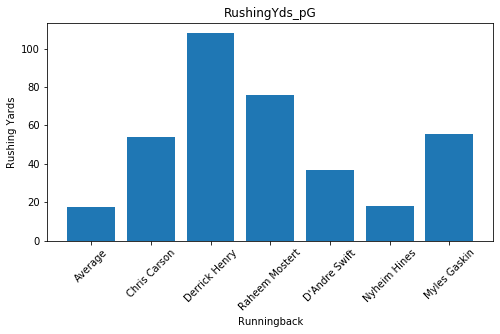

----------------------------------------
Defense

Avg Rushing_Yds_pG: 116.5
Philadelphia Eagles Rushing_Yds_pG: 133.4
--------------------------------------------------
Avg Rushing_Yds_pG: 116.5
Indianapolis Colts Rushing_Yds_pG: 89.2
--------------------------------------------------
Avg Rushing_Yds_pG: 116.5
Los Angeles Rams Rushing_Yds_pG: 91.3
--------------------------------------------------
Avg Rushing_Yds_pG: 116.5
Houston Texans Rushing_Yds_pG: 159.3
--------------------------------------------------
Avg Rushing_Yds_pG: 116.5
Tennessee Titans Rushing_Yds_pG: 121.5
--------------------------------------------------
Avg Rushing_Yds_pG: 116.5
New York Jets Rushing_Yds_pG: 111.7
--------------------------------------------------


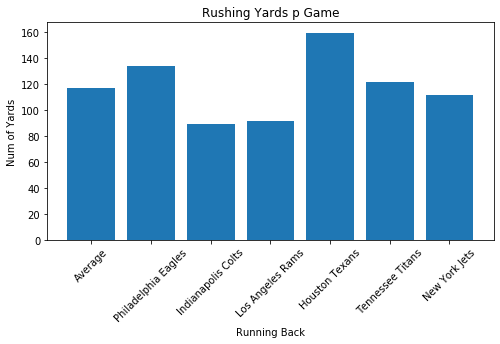

In [105]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingYds_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingYds_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingYds_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingYds_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Yards p Game', 'Running Back', 'Num of Yards')

Running Backs

Avg RushingTDs_pG: 0.11
Chris Carson RushingTDs_pG: 0.5
--------------------------------------------------
Avg RushingTDs_pG: 0.11
Derrick Henry RushingTDs_pG: 0.9
--------------------------------------------------
Avg RushingTDs_pG: 0.11
Raheem Mostert RushingTDs_pG: 0.25
--------------------------------------------------
Avg RushingTDs_pG: 0.11
D'Andre Swift RushingTDs_pG: 0.44
--------------------------------------------------
Avg RushingTDs_pG: 0.11
Nyheim Hines RushingTDs_pG: 0.2
--------------------------------------------------
Avg RushingTDs_pG: 0.11
Myles Gaskin RushingTDs_pG: 0.29
--------------------------------------------------


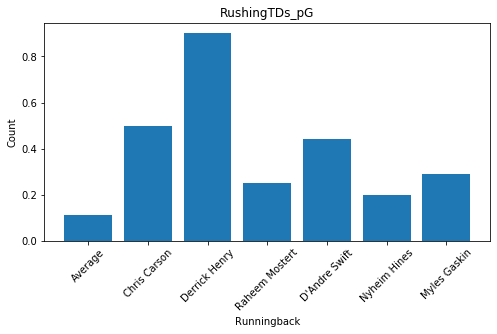

----------------------------------------
Defense

Avg Rushing_TDs_pG: 1.02
Philadelphia Eagles Rushing_TDs_pG: 1.5
--------------------------------------------------
Avg Rushing_TDs_pG: 1.02
Indianapolis Colts Rushing_TDs_pG: 0.8
--------------------------------------------------
Avg Rushing_TDs_pG: 1.02
Los Angeles Rams Rushing_TDs_pG: 0.8
--------------------------------------------------
Avg Rushing_TDs_pG: 1.02
Houston Texans Rushing_TDs_pG: 1.3
--------------------------------------------------
Avg Rushing_TDs_pG: 1.02
Tennessee Titans Rushing_TDs_pG: 1.0
--------------------------------------------------
Avg Rushing_TDs_pG: 1.02
New York Jets Rushing_TDs_pG: 1.2
--------------------------------------------------


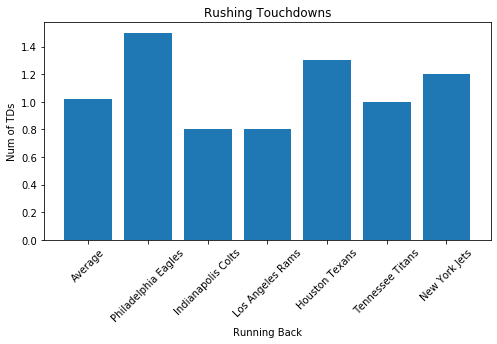

In [106]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingTDs_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingTDs_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingTDs_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingTDs_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingTDs_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingTDs_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingTDs_pG', 'Runningback', 'Count')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Touchdowns', 'Running Back', 'Num of TDs')

Running Backs

Avg LostFumbles_pG: 0.01
Chris Carson LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.01
Derrick Henry LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.01
Raheem Mostert LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.01
D'Andre Swift LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.01
Nyheim Hines LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.01
Myles Gaskin LostFumbles_pG: 0.14
--------------------------------------------------


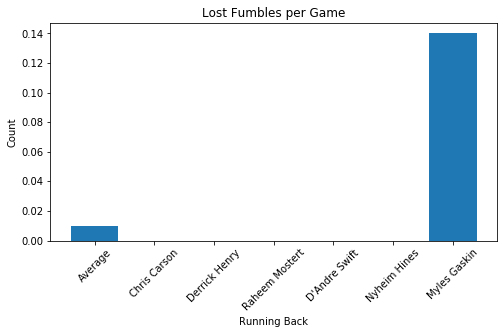

----------------------------------------
Defense

Avg Fumbles_pG: 0.5
Philadelphia Eagles Fumbles_pG: 0.8
--------------------------------------------------
Avg Fumbles_pG: 0.5
Indianapolis Colts Fumbles_pG: 0.5
--------------------------------------------------
Avg Fumbles_pG: 0.5
Los Angeles Rams Fumbles_pG: 0.5
--------------------------------------------------
Avg Fumbles_pG: 0.5
Houston Texans Fumbles_pG: 0.3
--------------------------------------------------
Avg Fumbles_pG: 0.5
Tennessee Titans Fumbles_pG: 0.5
--------------------------------------------------
Avg Fumbles_pG: 0.5
New York Jets Fumbles_pG: 0.4
--------------------------------------------------


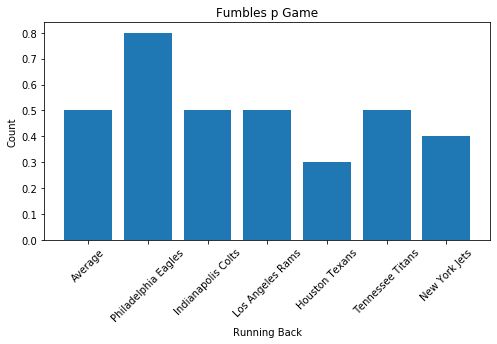

In [107]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'LostFumbles_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'LostFumbles_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'LostFumbles_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'LostFumbles_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'LostFumbles_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'LostFumbles_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Lost Fumbles per Game', 'Running Back', 'Count')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Fumbles_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Fumbles_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Fumbles_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Fumbles_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Fumbles_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Fumbles_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Fumbles p Game', 'Running Back', 'Count')

#### Additional Running Back Analysis

Avg Targeted_pG: 1.35
Chris Carson Targeted_pG: 4.17
--------------------------------------------------
Avg Targeted_pG: 1.35
Derrick Henry Targeted_pG: 2.2
--------------------------------------------------
Avg Targeted_pG: 1.35
Raheem Mostert Targeted_pG: 3.0
--------------------------------------------------
Avg Targeted_pG: 1.35
D'Andre Swift Targeted_pG: 4.33
--------------------------------------------------
Avg Targeted_pG: 1.35
Nyheim Hines Targeted_pG: 4.5
--------------------------------------------------
Avg Targeted_pG: 1.35
Myles Gaskin Targeted_pG: 5.0
--------------------------------------------------


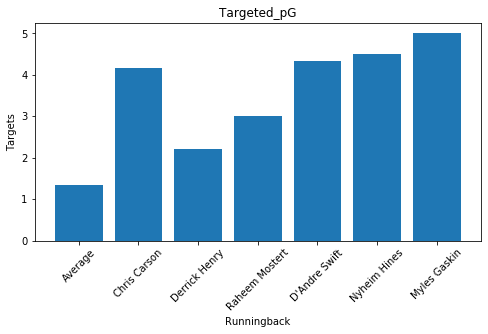

In [108]:
average, rb_1, _1rb = print_metric(available_rbs, 'Targeted_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Targeted_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Targeted_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Targeted_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Targeted_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Targeted_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.04
Chris Carson Receptions_pG: 3.67
--------------------------------------------------
Avg Receptions_pG: 1.04
Derrick Henry Receptions_pG: 1.2
--------------------------------------------------
Avg Receptions_pG: 1.04
Raheem Mostert Receptions_pG: 2.75
--------------------------------------------------
Avg Receptions_pG: 1.04
D'Andre Swift Receptions_pG: 3.44
--------------------------------------------------
Avg Receptions_pG: 1.04
Nyheim Hines Receptions_pG: 3.6
--------------------------------------------------
Avg Receptions_pG: 1.04
Myles Gaskin Receptions_pG: 4.29
--------------------------------------------------


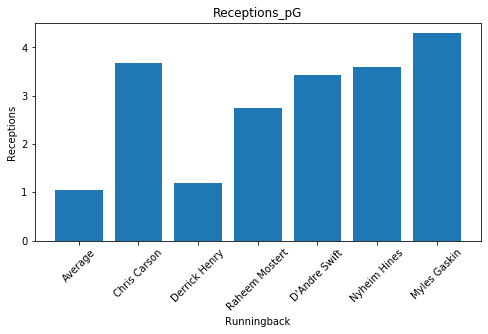

In [109]:
average, rb_1, _1rb = print_metric(available_rbs, 'Receptions_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Receptions_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Receptions_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Receptions_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Receptions_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Receptions_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')


## Tight End

In [110]:
tight_ends = offense[offense['Position'] == 'TE']

In [111]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')
per_week_stats(tight_ends, 'LostFumbles', 'Games')

In [112]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
6,Travis Kelce,KAN,TE,31,10,10,1,1,4,0,0,0,0,0.00,0,90,66,896,18.80,7,1,1,7,0,0,162.80,1,7,129.80,11.00,15.00,8.70,7.00,16.80,16.50,3.10,16.90,15.90,0.00,18.90,9.00,6.60,89.60,0.70,0.10
38,Jonnu Smith,TEN,TE,25,10,10,0,0,0,0,0,1,1,1.00,1,49,30,338,13.70,7,0,0,8,0,0,96.90,2,39,81.90,9.60,20.40,6.10,0.00,16.00,1.30,0.90,2.90,9.20,7.50,8.00,4.90,3.00,33.80,0.70,0.00
39,Mark Andrews,BAL,TE,25,10,2,0,0,0,0,0,0,0,0.00,0,60,38,454,20.50,6,2,0,6,0,0,100.40,3,40,81.40,17.80,2.90,2.20,17.70,11.60,2.10,0.00,3.20,2.20,6.10,15.60,6.00,3.80,45.40,0.60,0.00
40,Darren Waller,LVR,TE,28,10,9,0,0,0,0,0,0,0,0.00,0,83,60,519,14.50,5,1,1,5,0,0,109.90,4,41,79.90,4.50,16.30,0.90,6.80,10.80,0.00,11.00,2.80,8.20,3.70,14.80,8.30,6.00,51.90,0.50,0.10
44,T.J. Hockenson,DET,TE,23,10,10,0,0,0,0,0,0,0,0.00,0,60,40,441,11.30,5,0,0,5,1,0,96.10,5,45,76.10,11.60,6.20,5.30,8.90,0.00,7.70,11.90,6.50,9.90,1.30,6.80,6.00,4.00,44.10,0.50,0.00


In [113]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
38,Jonnu Smith,TEN,TE,25,10,10,0,0,0,0,0,1,1,1.00,1,49,30,338,13.70,7,0,0,8,0,0,96.90,2,39,81.90,9.60,20.40,6.10,0.00,16.00,1.30,0.90,2.90,9.20,7.50,8.00,4.90,3.00,33.80,0.70,0.00
59,Rob Gronkowski,TAM,TE,31,11,11,0,0,0,0,0,0,0,0.00,0,55,31,399,20.70,4,1,0,4,0,0,79.40,7,60,63.90,1.10,0.00,4.80,2.90,5.20,13.80,12.20,10.10,0.20,11.10,2.50,5.00,2.82,36.27,0.36,0.00
169,Logan Thomas,WAS,TE,29,10,9,0,0,0,0,0,1,2,2.00,0,56,30,308,12.70,3,0,0,3,0,0,64.00,18,,49.00,9.70,2.60,3.10,0.80,0.40,10.20,12.00,0.00,2.80,6.60,0.80,5.60,3.00,30.80,0.30,0.00


In [114]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]

In [115]:
scaled_te = available_te[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'Targeted_pG', 
                          'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

te_columns = ['Targeted_pG', 'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_te, te_columns)

scaled_te.head()

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
38,Jonnu Smith,TEN,TE,25,10,10,1.82,1.56,1.63,3.78,-0.36
59,Rob Gronkowski,TAM,TE,31,11,11,1.88,1.39,1.84,1.52,-0.36
68,Jimmy Graham,CHI,TE,34,10,10,2.31,2.03,1.34,2.44,-0.36
138,Eric Ebron,PIT,TE,27,10,8,2.25,2.03,1.81,1.77,2.12
144,Dalton Schultz,DAL,TE,24,10,8,2.56,2.40,2.21,1.10,2.12


In [116]:
scaled_te['Combined_Score'] = (scaled_te['Targeted_pG'] + scaled_te['Receptions_pG'] + 
                               scaled_te['ReceivingYds_pG'] + scaled_te['ReceivingTDs_pG'] -
                               scaled_te['LostFumbles_pG'])

scaled_te.sort_values('Combined_Score', ascending = False, inplace = True)
scaled_te.head(10)

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
324,C.J. Uzomah,CIN,TE,27,2,2,2.19,2.49,2.43,2.44,-0.36,9.90
38,Jonnu Smith,TEN,TE,25,10,10,1.82,1.56,1.63,3.78,-0.36,9.15
68,Jimmy Graham,CHI,TE,34,10,10,2.31,2.03,1.34,2.44,-0.36,8.47
205,Dallas Goedert,PHI,TE,25,6,4,1.98,2.33,2.46,1.32,-0.36,8.45
255,O.J. Howard,TAM,TE,26,4,1,1.73,1.33,1.86,2.44,-0.36,7.70
258,Jordan Reed,SFO,TE,30,5,0,1.76,1.93,1.32,1.77,-0.36,7.14
59,Rob Gronkowski,TAM,TE,31,11,11,1.88,1.39,1.84,1.52,-0.36,6.99
169,Logan Thomas,WAS,TE,29,10,9,2.25,1.56,1.39,1.10,-0.36,6.65
161,Tyler Higbee,LAR,TE,27,9,9,1.20,1.56,1.73,1.32,-0.36,6.17
144,Dalton Schultz,DAL,TE,24,10,8,2.56,2.40,2.21,1.10,2.12,6.14


In [117]:
te1 = 38
te2 = 68
te3 = 59
te4 = 205

Week 12 Opponents:
    
    Tennessee Titans vs Indianapolis Colts
    Chicago Bears vs Green Bay Packers
    Tampa Bay Buccaneers vs Kansas City Chiefs
    Dallas Cowboys vs Seattle Seahawks
    

In [118]:
te_opp = ['Indianapolis Colts', 'Green Bay Packers', 'Kansas City Chiefs', 'Seattle Seahawks']
defense[defense['Team'].isin(te_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
4,Indianapolis Colts,10,208,598,5.00,2981,252,892,3.50,8,324,6.00,205,11.00,2089,14,29,19,65.50,17,12,5,22,106.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,10.00,8.00,20.80,298.10,25.20,89.20,0.80,32.40,20.50,0.63,208.90,1.40,2.20,1.70,0.50,2.20,10.60
6,Kansas City Chiefs,10,214,646,5.50,3551,288,1335,4.60,10,339,6.20,215,10.80,2216,14,29,22,75.90,15,10,5,19,74.00,7.00,5.00,7.00,20.00,-1.00,3.00,18.00,7.00,1.00,0.00,1.00,21.40,355.10,28.80,133.50,1.00,33.90,21.50,0.63,221.60,1.40,2.40,1.50,0.50,1.90,7.40
15,Green Bay Packers,10,258,597,5.80,3443,256,1137,4.40,11,320,6.80,217,11.30,2306,17,32,21,65.60,9,5,4,21,46.00,5.00,12.00,3.00,5.00,0.00,-1.00,6.00,0.00,6.00,6.00,4.00,25.80,344.30,25.60,113.70,1.10,32.00,21.70,0.68,230.60,1.70,2.80,0.90,0.40,2.10,4.60
28,Seattle Seahawks,10,287,721,6.00,4349,251,912,3.60,15,445,7.30,310,11.50,3437,18,40,28,70.00,15,9,6,25,50.00,6.00,3.00,9.00,5.00,7.00,0.00,0.00,7.00,3.00,5.00,5.00,28.70,434.90,25.10,91.20,1.50,44.50,31.00,0.70,343.70,1.80,3.30,1.50,0.60,2.50,5.00


In [119]:
teamTE1 = 4
teamTE2 = 15
teamTE3 = 6
teamTE4 = 28

#### Tight End Comparison

Tight Ends

Avg Targeted_pG: 1.94
Jonnu Smith Targeted_pG: 4.9
--------------------------------------------------
Avg Targeted_pG: 1.94
Jimmy Graham Targeted_pG: 5.7
--------------------------------------------------
Avg Targeted_pG: 1.94
Rob Gronkowski Targeted_pG: 5.0
--------------------------------------------------
Avg Targeted_pG: 1.94
Dallas Goedert Targeted_pG: 5.17
--------------------------------------------------


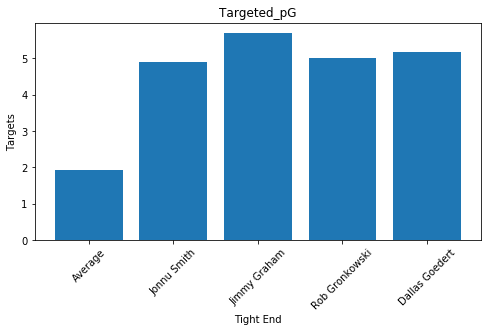

----------------------------------------
Defense

Avg Passing_Att_pG: 35.24
Indianapolis Colts Passing_Att_pG: 32.4
--------------------------------------------------
Avg Passing_Att_pG: 35.24
Green Bay Packers Passing_Att_pG: 32.0
--------------------------------------------------
Avg Passing_Att_pG: 35.24
Kansas City Chiefs Passing_Att_pG: 33.9
--------------------------------------------------
Avg Passing_Att_pG: 35.24
Seattle Seahawks Passing_Att_pG: 44.5
--------------------------------------------------


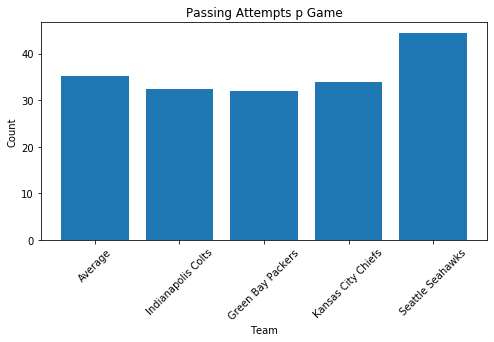

In [120]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'Targeted_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Targeted_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Targeted_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Targeted_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Att_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Att_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Att_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Att_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Attempts p Game', 'Team', 'Count')

Tight Ends

Avg Receptions_pG: 1.32
Jonnu Smith Receptions_pG: 3.0
--------------------------------------------------
Avg Receptions_pG: 1.32
Jimmy Graham Receptions_pG: 3.5
--------------------------------------------------
Avg Receptions_pG: 1.32
Rob Gronkowski Receptions_pG: 2.82
--------------------------------------------------
Avg Receptions_pG: 1.32
Dallas Goedert Receptions_pG: 3.83
--------------------------------------------------


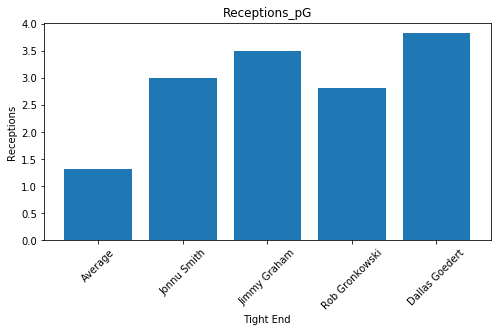

----------------------------------------
Defense

Avg Completions_pG: 23.14
Indianapolis Colts Completions_pG: 20.5
--------------------------------------------------
Avg Completions_pG: 23.14
Green Bay Packers Completions_pG: 21.7
--------------------------------------------------
Avg Completions_pG: 23.14
Kansas City Chiefs Completions_pG: 21.5
--------------------------------------------------
Avg Completions_pG: 23.14
Seattle Seahawks Completions_pG: 31.0
--------------------------------------------------


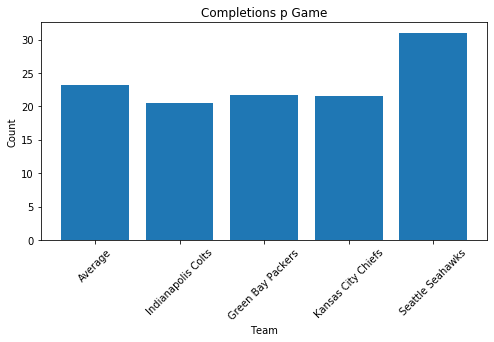

In [121]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'Receptions_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Receptions_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Receptions_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Receptions_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Receptions')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Completions_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Completions_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Completions_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Completions_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Completions p Game', 'Team', 'Count')

Tight Ends

Avg ReceivingYds_pG: 13.83
Jonnu Smith ReceivingYds_pG: 33.8
--------------------------------------------------
Avg ReceivingYds_pG: 13.83
Jimmy Graham ReceivingYds_pG: 30.2
--------------------------------------------------
Avg ReceivingYds_pG: 13.83
Rob Gronkowski ReceivingYds_pG: 36.27
--------------------------------------------------
Avg ReceivingYds_pG: 13.83
Dallas Goedert ReceivingYds_pG: 43.83
--------------------------------------------------


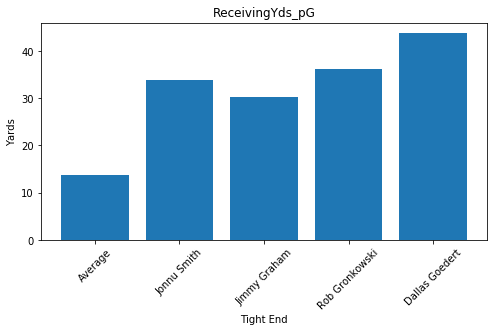

----------------------------------------
Defense

Avg Passing_Yds_pG: 242.79
Indianapolis Colts Passing_Yds_pG: 208.9
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
Green Bay Packers Passing_Yds_pG: 230.6
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
Kansas City Chiefs Passing_Yds_pG: 221.6
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
Seattle Seahawks Passing_Yds_pG: 343.7
--------------------------------------------------


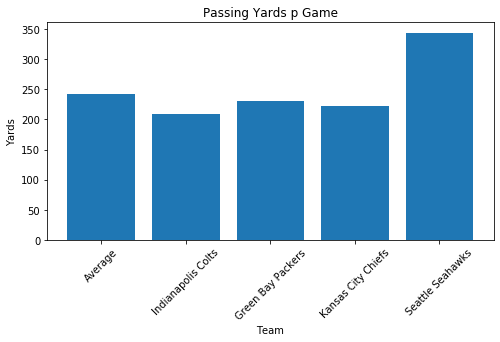

In [122]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'ReceivingYds_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingYds_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingYds_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingYds_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Yards')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamTE4)


x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Yards p Game', 'Team', 'Yards')

Tight Ends

Avg ReceivingTDs_pG: 0.14
Jonnu Smith ReceivingTDs_pG: 0.7
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Jimmy Graham ReceivingTDs_pG: 0.5
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Rob Gronkowski ReceivingTDs_pG: 0.36
--------------------------------------------------
Avg ReceivingTDs_pG: 0.14
Dallas Goedert ReceivingTDs_pG: 0.33
--------------------------------------------------


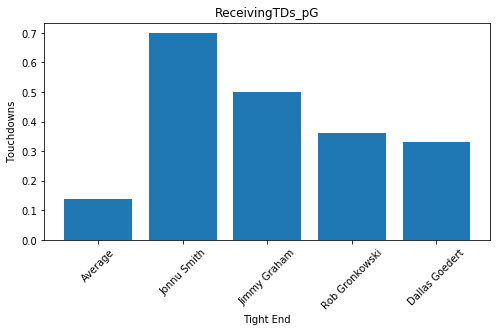

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.72
Indianapolis Colts Passing_TDs_pG: 1.4
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
Green Bay Packers Passing_TDs_pG: 1.7
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
Kansas City Chiefs Passing_TDs_pG: 1.4
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
Seattle Seahawks Passing_TDs_pG: 1.8
--------------------------------------------------


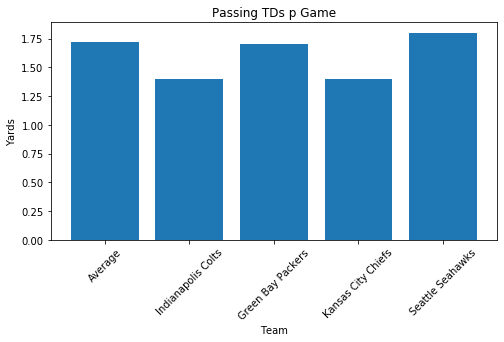

In [123]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'ReceivingTDs_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingTDs_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingTDs_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingTDs_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingTDs_pG', 'Tight End', 'Touchdowns')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing TDs p Game', 'Team', 'Yards')



## Wide Receiver

In [124]:
wrs = offense[offense['Position'] == 'WR']

In [125]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')
per_week_stats(wrs, 'LostFumbles', 'Games')

In [126]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
29,DeAndre Hopkins,ARI,WR,28,10,10,0,0,0,0,0,0,0,0.00,0,96,72,912,18.70,4,1,1,4,0,0,149.20,10,30,113.20,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,18.70,5.10,9.60,7.20,0.75,91.20,0.40,0.10
51,Tyler Boyd,CIN,WR,26,10,7,1,1,16,0,0,4,38,14.00,0,87,69,710,12.90,3,1,0,3,0,0,127.90,18,52,93.40,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,4.10,8.50,8.70,6.90,0.79,71.00,0.30,0.00
57,Robby Anderson,CAR,WR,27,11,11,0,0,0,0,0,1,3,3.00,0,95,71,818,16.20,1,1,1,1,1,0,123.60,22,58,88.20,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,2.10,4.60,8.64,6.45,0.75,74.36,0.09,0.09
61,Julio Jones,ATL,WR,31,8,8,0,0,0,0,0,0,0,0.00,0,58,45,677,15.40,3,0,0,3,0,0,108.20,25,62,85.70,15.70,2.40,0.00,3.20,0.00,25.70,9.70,13.70,11.40,0.00,3.90,7.25,5.62,0.78,84.62,0.38,0.00
134,Jamison Crowder,NYJ,WR,27,6,5,0,0,0,0,0,0,0,0.00,0,51,32,425,15.80,3,0,0,3,0,0,76.50,50,,60.50,17.50,0.00,0.00,10.40,17.60,4.80,0.00,0.00,8.60,0.00,1.60,8.50,5.33,0.63,70.83,0.50,0.00


In [127]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
available_wrs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
29,DeAndre Hopkins,ARI,WR,28,10,10,0,0,0,0,0,0,0,0.00,0,96,72,912,18.70,4,1,1,4,0,0,149.20,10,30,113.20,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,18.70,5.10,9.60,7.20,0.75,91.20,0.40,0.10
51,Tyler Boyd,CIN,WR,26,10,7,1,1,16,0,0,4,38,14.00,0,87,69,710,12.90,3,1,0,3,0,0,127.90,18,52,93.40,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,4.10,8.50,8.70,6.90,0.79,71.00,0.30,0.00
54,CeeDee Lamb,DAL,WR,21,10,8,0,0,0,0,0,7,45,10.30,0,74,48,629,14.00,4,2,1,4,1,0,115.40,20,55,91.40,5.90,11.50,6.60,20.20,12.40,6.40,0.10,4.60,11.10,0.00,12.60,7.40,4.80,0.65,62.90,0.40,0.10
57,Robby Anderson,CAR,WR,27,11,11,0,0,0,0,0,1,3,3.00,0,95,71,818,16.20,1,1,1,1,1,0,123.60,22,58,88.20,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,2.10,4.60,8.64,6.45,0.75,74.36,0.09,0.09
58,Tee Higgins,CIN,WR,21,10,8,0,0,0,0,0,5,28,11.00,0,71,43,629,20.30,4,1,1,4,0,0,109.20,23,59,87.70,0.00,3.50,16.00,9.00,6.20,12.70,13.80,8.40,0.00,15.50,2.60,7.10,4.30,0.61,62.90,0.40,0.10


In [129]:
scaled_wrs = available_wrs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'Targeted_pG', 'Receptions_pG', 
                            'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

wr_columns = ['Targeted_pG', 'Receptions_pG', 'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_wrs, wr_columns)

scaled_wrs.head()

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
29,DeAndre Hopkins,ARI,WR,10,10,2.80,3.33,0.47,3.19,1.74,1.19
51,Tyler Boyd,CIN,WR,10,7,2.41,3.14,0.71,2.21,1.10,-0.31
54,CeeDee Lamb,DAL,WR,10,8,1.85,1.78,-0.10,1.82,1.74,1.19
57,Robby Anderson,CAR,WR,11,11,2.38,2.85,0.45,2.37,-0.23,1.05
58,Tee Higgins,CIN,WR,10,8,1.72,1.46,-0.34,1.82,1.74,1.19


In [130]:
scaled_wrs['Combined_Score'] = (scaled_wrs['Targeted_pG'] + scaled_wrs['Receptions_pG'] + 
                                scaled_wrs['Catch_Rate'] + scaled_wrs['ReceivingYds_pG'] + 
                                scaled_wrs['ReceivingTDs_pG'] - scaled_wrs['LostFumbles_pG'])

scaled_wrs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_wrs.head(10)

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
29,DeAndre Hopkins,ARI,WR,10,10,2.80,3.33,0.47,3.19,1.74,1.19,10.33
51,Tyler Boyd,CIN,WR,10,7,2.41,3.14,0.71,2.21,1.10,-0.31,9.87
61,Julio Jones,ATL,WR,8,8,1.78,2.31,0.61,2.87,1.58,-0.31,9.46
134,Jamison Crowder,NYJ,WR,6,5,2.32,2.12,-0.22,2.20,2.37,-0.31,9.12
73,Cole Beasley,BUF,WR,10,6,1.54,2.23,0.86,1.88,1.10,-0.31,7.93
113,Corey Davis,TEN,WR,8,6,1.62,1.83,0.24,2.10,1.58,-0.31,7.67
196,Allen Lazard,GNB,WR,4,3,0.91,1.10,0.27,2.06,2.37,-0.31,7.03
57,Robby Anderson,CAR,WR,11,11,2.38,2.85,0.45,2.37,-0.23,1.05,6.77
67,Christian Kirk,ARI,WR,9,8,1.14,0.90,-0.39,1.34,3.43,-0.31,6.74
76,Brandin Cooks,HOU,WR,10,10,1.80,1.72,-0.13,1.84,1.10,-0.31,6.64


In [131]:
wr1 = 29
wr2 = 51
wr3 = 61
wr4 = 134
wr5 = 73
wr6 = 113
wr7 = 57
wr8 = 76

Week 12 Opponents:

    Arizona Cardinals vs New England Patroits
    Cincinnati Bengals vs New York Giants
    Atlanta Falcons vs Las Vegas Raiders
    New York Jets vs Miami Dolphins
    Buffalo Bills vs Los Angeles Chargers
    Tennessee Titans vs Indianapolis Colts
    Carolina Panthers vs Minnesota Vikings
    Houston Texans vs Detroit Lions


In [132]:
wr_opp = ['New England Patriots', 'New York Giants', 'Las Vegas Raiders', 'Miami Dolphins', 
          'Los Angeles Chargers', 'Indianapolis Colts', 'Minnesota Vikings','Detroit Lions']
defense[defense['Team'].isin(list(wr_opp))]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
3,Miami Dolphins,10,202,657,5.80,3806,277,1342,4.80,13,358,6.50,224,11.90,2464,13,32,21,65.60,17,9,8,22,88.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,5.00,20.20,380.60,27.70,134.20,1.30,35.80,22.40,0.63,246.40,1.30,2.60,1.70,0.80,2.20,8.80
4,Indianapolis Colts,10,208,598,5.00,2981,252,892,3.50,8,324,6.00,205,11.00,2089,14,29,19,65.50,17,12,5,22,106.00,4.00,15.00,26.00,7.00,5.00,4.00,0.00,15.00,5.00,10.00,8.00,20.80,298.10,25.20,89.20,0.80,32.40,20.50,0.63,208.90,1.40,2.20,1.70,0.50,2.20,10.60
10,New York Giants,10,236,642,5.60,3586,255,1009,4.00,10,362,6.70,247,11.20,2577,15,37,20,54.10,15,8,7,25,67.00,4.00,9.00,-2.00,5.00,11.00,14.00,5.00,4.00,13.00,4.00,0.00,23.60,358.60,25.50,100.90,1.00,36.20,24.70,0.68,257.70,1.50,2.50,1.50,0.70,2.50,6.70
11,New England Patriots,10,238,576,6.20,3579,281,1218,4.30,9,282,8.00,195,12.60,2361,16,32,20,62.50,15,11,4,13,58.00,11.00,6.00,15.00,4.00,0.00,7.00,4.00,3.00,3.00,5.00,0.00,23.80,357.90,28.10,121.80,0.90,28.20,19.50,0.69,236.10,1.60,2.50,1.50,0.40,1.30,5.80
23,Los Angeles Chargers,10,273,616,5.60,3440,248,1153,4.60,10,351,6.20,218,10.90,2287,20,33,20,60.60,9,5,4,17,43.00,11.00,1.00,2.00,4.00,3.00,0.00,8.00,3.00,2.00,1.00,8.00,27.30,344.00,24.80,115.30,1.00,35.10,21.80,0.62,228.70,2.00,3.00,0.90,0.40,1.70,4.30
25,Las Vegas Raiders,10,276,648,6.00,3858,255,1122,4.40,16,382,7.00,242,11.60,2736,16,41,27,65.90,11,8,3,11,32.00,0.00,2.00,3.00,0.00,4.00,0.00,-4.00,9.00,4.00,16.00,-2.00,27.60,385.80,25.50,112.20,1.60,38.20,24.20,0.63,273.60,1.60,3.20,1.10,0.30,1.10,3.20
26,Minnesota Vikings,10,278,663,5.80,3828,284,1221,4.30,6,360,6.90,240,11.30,2607,22,36,20,55.60,12,8,4,19,39.00,-4.00,3.00,2.00,5.00,6.00,0.00,0.00,3.00,9.00,10.00,4.00,27.80,382.80,28.40,122.10,0.60,36.00,24.00,0.67,260.70,2.20,2.80,1.20,0.40,1.90,3.90
27,Detroit Lions,10,287,677,5.90,3974,307,1390,4.50,17,356,7.00,234,11.60,2584,18,41,28,68.30,10,7,3,14,23.00,1.00,-3.00,7.00,0.00,0.00,6.00,4.00,-2.00,0.00,4.00,6.00,28.70,397.40,30.70,139.00,1.70,35.60,23.40,0.66,258.40,1.80,3.50,1.00,0.30,1.40,2.30


In [133]:
teamWR1 = 11
teamWR2 = 10
teamWR3 = 25
teamWR4 = 3
teamWR5 = 23
teamWR6 = 4
teamWR7 = 26
teamWR8 = 27

#### Wide Receiver Comparison

Wide Receivers

Avg Targeted_pG: 3.15
DeAndre Hopkins Targeted_pG: 9.6
--------------------------------------------------
Avg Targeted_pG: 3.15
Tyler Boyd Targeted_pG: 8.7
--------------------------------------------------
Avg Targeted_pG: 3.15
Julio Jones Targeted_pG: 7.25
--------------------------------------------------
Avg Targeted_pG: 3.15
Jamison Crowder Targeted_pG: 8.5
--------------------------------------------------
Avg Targeted_pG: 3.15
Cole Beasley Targeted_pG: 6.7
--------------------------------------------------
Avg Targeted_pG: 3.15
Corey Davis Targeted_pG: 6.88
--------------------------------------------------
Avg Targeted_pG: 3.15
Robby Anderson Targeted_pG: 8.64
--------------------------------------------------
Avg Targeted_pG: 3.15
Christian Kirk Targeted_pG: 5.78
--------------------------------------------------


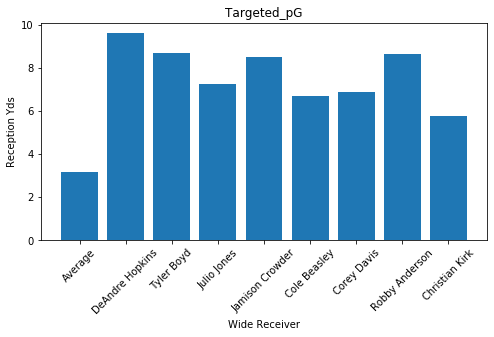

----------------------------------------
Defense

Avg Passing_Att_pG: 35.24
New England Patriots Passing_Att_pG: 28.2
--------------------------------------------------
Avg Passing_Att_pG: 35.24
New York Giants Passing_Att_pG: 36.2
--------------------------------------------------
Avg Passing_Att_pG: 35.24
Las Vegas Raiders Passing_Att_pG: 38.2
--------------------------------------------------
Avg Passing_Att_pG: 35.24
Miami Dolphins Passing_Att_pG: 35.8
--------------------------------------------------
Avg Passing_Att_pG: 35.24
Los Angeles Chargers Passing_Att_pG: 35.1
--------------------------------------------------
Avg Passing_Att_pG: 35.24
Indianapolis Colts Passing_Att_pG: 32.4
--------------------------------------------------
Avg Passing_Att_pG: 35.24
Minnesota Vikings Passing_Att_pG: 36.0
--------------------------------------------------
Avg Passing_Att_pG: 35.24
Detroit Lions Passing_Att_pG: 35.6
--------------------------------------------------


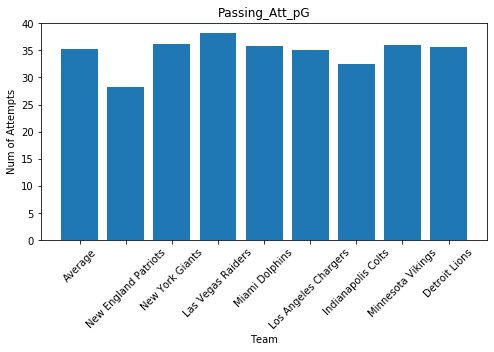

In [135]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Targeted_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Targeted_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Targeted_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Targeted_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Targeted_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Targeted_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Targeted_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Targeted_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Att_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Att_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Att_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Att_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Att_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Att_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Att_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Att_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Att_pG', 'Team', 'Num of Attempts')

Wide Receivers

Avg Receptions_pG: 2.04
DeAndre Hopkins Receptions_pG: 7.2
--------------------------------------------------
Avg Receptions_pG: 2.04
Tyler Boyd Receptions_pG: 6.9
--------------------------------------------------
Avg Receptions_pG: 2.04
Julio Jones Receptions_pG: 5.62
--------------------------------------------------
Avg Receptions_pG: 2.04
Jamison Crowder Receptions_pG: 5.33
--------------------------------------------------
Avg Receptions_pG: 2.04
Cole Beasley Receptions_pG: 5.5
--------------------------------------------------
Avg Receptions_pG: 2.04
Corey Davis Receptions_pG: 4.88
--------------------------------------------------
Avg Receptions_pG: 2.04
Robby Anderson Receptions_pG: 6.45
--------------------------------------------------
Avg Receptions_pG: 2.04
Christian Kirk Receptions_pG: 3.44
--------------------------------------------------


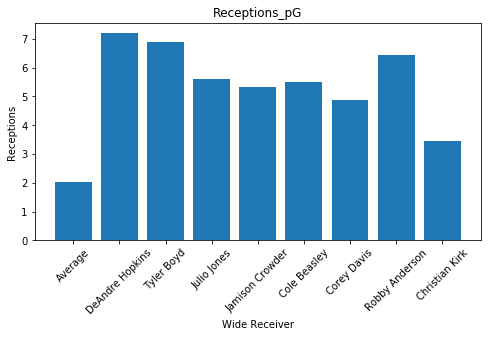

----------------------------------------
Defense

Avg Completions_pG: 23.14
New England Patriots Completions_pG: 19.5
--------------------------------------------------
Avg Completions_pG: 23.14
New York Giants Completions_pG: 24.7
--------------------------------------------------
Avg Completions_pG: 23.14
Las Vegas Raiders Completions_pG: 24.2
--------------------------------------------------
Avg Completions_pG: 23.14
Miami Dolphins Completions_pG: 22.4
--------------------------------------------------
Avg Completions_pG: 23.14
Los Angeles Chargers Completions_pG: 21.8
--------------------------------------------------
Avg Completions_pG: 23.14
Indianapolis Colts Completions_pG: 20.5
--------------------------------------------------
Avg Completions_pG: 23.14
Minnesota Vikings Completions_pG: 24.0
--------------------------------------------------
Avg Completions_pG: 23.14
Detroit Lions Completions_pG: 23.4
--------------------------------------------------


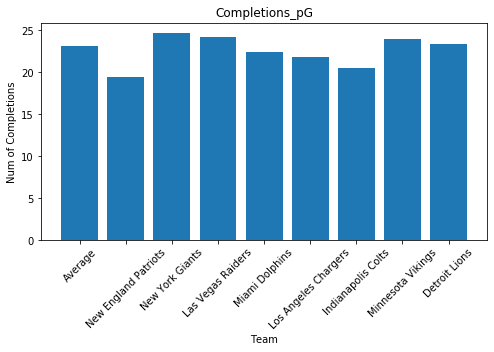

In [137]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Receptions_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Receptions_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Receptions_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Receptions_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Receptions_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Receptions_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Receptions_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Receptions_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Receptions')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Completions_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completions_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completions_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completions_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completions_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completions_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completions_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completions_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completions_pG', 'Team', 'Num of Completions')

Wide Receivers

Avg Catch_Rate: 0.67
DeAndre Hopkins Catch_Rate: 0.75
--------------------------------------------------
Avg Catch_Rate: 0.67
Tyler Boyd Catch_Rate: 0.79
--------------------------------------------------
Avg Catch_Rate: 0.67
Julio Jones Catch_Rate: 0.78
--------------------------------------------------
Avg Catch_Rate: 0.67
Jamison Crowder Catch_Rate: 0.63
--------------------------------------------------
Avg Catch_Rate: 0.67
Cole Beasley Catch_Rate: 0.82
--------------------------------------------------
Avg Catch_Rate: 0.67
Corey Davis Catch_Rate: 0.71
--------------------------------------------------
Avg Catch_Rate: 0.67
Robby Anderson Catch_Rate: 0.75
--------------------------------------------------
Avg Catch_Rate: 0.67
Christian Kirk Catch_Rate: 0.6
--------------------------------------------------


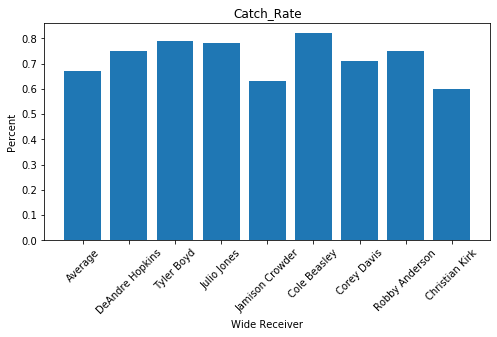

----------------------------------------
Defense

Avg Completion_Percent_Allowed: 0.66
New England Patriots Completion_Percent_Allowed: 0.69
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
New York Giants Completion_Percent_Allowed: 0.68
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Las Vegas Raiders Completion_Percent_Allowed: 0.63
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Miami Dolphins Completion_Percent_Allowed: 0.63
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Los Angeles Chargers Completion_Percent_Allowed: 0.62
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Indianapolis Colts Completion_Percent_Allowed: 0.63
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Minnesota Vikings Completion_Percent_Allowed: 0.67
--------------------------

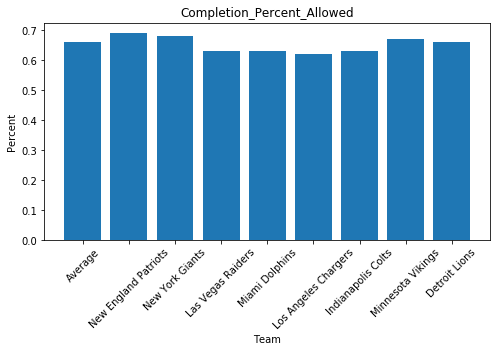

In [138]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Catch_Rate', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Catch_Rate', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Catch_Rate', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Catch_Rate', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Catch_Rate', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Catch_Rate', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Catch_Rate', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Catch_Rate', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Percent')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completion_Percent_Allowed', 'Team', 'Percent')

Wide Receivers

Avg ReceivingYds_pG: 25.43
DeAndre Hopkins ReceivingYds_pG: 91.2
--------------------------------------------------
Avg ReceivingYds_pG: 25.43
Tyler Boyd ReceivingYds_pG: 71.0
--------------------------------------------------
Avg ReceivingYds_pG: 25.43
Julio Jones ReceivingYds_pG: 84.62
--------------------------------------------------
Avg ReceivingYds_pG: 25.43
Jamison Crowder ReceivingYds_pG: 70.83
--------------------------------------------------
Avg ReceivingYds_pG: 25.43
Cole Beasley ReceivingYds_pG: 64.2
--------------------------------------------------
Avg ReceivingYds_pG: 25.43
Corey Davis ReceivingYds_pG: 68.62
--------------------------------------------------
Avg ReceivingYds_pG: 25.43
Robby Anderson ReceivingYds_pG: 74.36
--------------------------------------------------
Avg ReceivingYds_pG: 25.43
Christian Kirk ReceivingYds_pG: 53.0
--------------------------------------------------


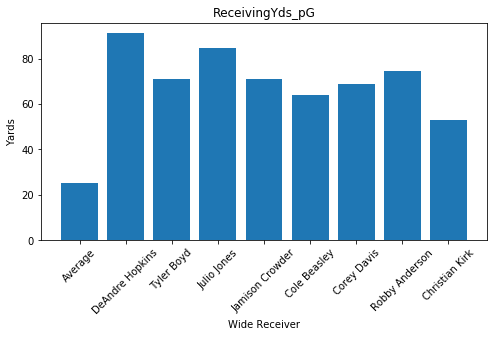

----------------------------------------
Defense

Avg Passing_Yds_pG: 242.79
New England Patriots Passing_Yds_pG: 236.1
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
New York Giants Passing_Yds_pG: 257.7
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
Las Vegas Raiders Passing_Yds_pG: 273.6
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
Miami Dolphins Passing_Yds_pG: 246.4
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
Los Angeles Chargers Passing_Yds_pG: 228.7
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
Indianapolis Colts Passing_Yds_pG: 208.9
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
Minnesota Vikings Passing_Yds_pG: 260.7
--------------------------------------------------
Avg Passing_Yds_pG: 242.79
Detroit Lions Passing_Yds_pG: 258.4
--------------------------------------------------


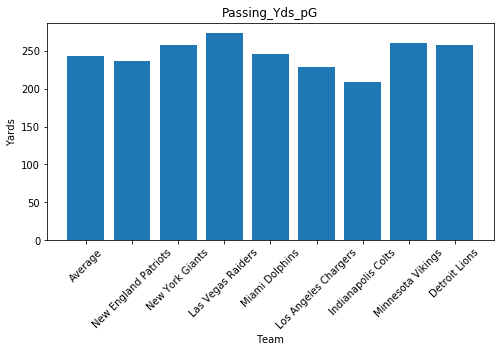

In [139]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingYds_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingYds_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingYds_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingYds_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Yards')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Yds_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Yds_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Yds_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Yds_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Wide Receivers

Avg ReceivingTDs_pG: 0.13
DeAndre Hopkins ReceivingTDs_pG: 0.4
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Tyler Boyd ReceivingTDs_pG: 0.3
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Julio Jones ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Jamison Crowder ReceivingTDs_pG: 0.5
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Cole Beasley ReceivingTDs_pG: 0.3
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Corey Davis ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Robby Anderson ReceivingTDs_pG: 0.09
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Christian Kirk ReceivingTDs_pG: 0.67
--------------------------------------------------


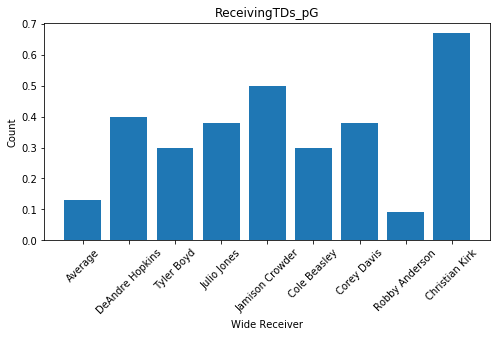

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.72
New England Patriots Passing_TDs_pG: 1.6
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
New York Giants Passing_TDs_pG: 1.5
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
Las Vegas Raiders Passing_TDs_pG: 1.6
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
Miami Dolphins Passing_TDs_pG: 1.3
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
Los Angeles Chargers Passing_TDs_pG: 2.0
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
Indianapolis Colts Passing_TDs_pG: 1.4
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
Minnesota Vikings Passing_TDs_pG: 2.2
--------------------------------------------------
Avg Passing_TDs_pG: 1.72
Detroit Lions Passing_TDs_pG: 1.8
--------------------------------------------------


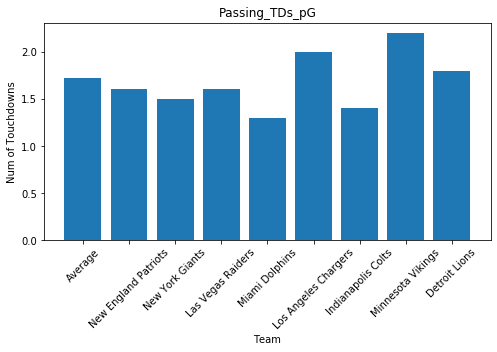

In [140]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingTDs_pG', 'Wide Receiver', 'Count')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_TDs_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_TDs_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_TDs_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_TDs_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

#### Additional Defense Stats

Avg Ttl_Pts_Allowed_pG: 24.89
New England Patriots Ttl_Pts_Allowed_pG: 23.8
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.89
New York Giants Ttl_Pts_Allowed_pG: 23.6
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.89
Las Vegas Raiders Ttl_Pts_Allowed_pG: 27.6
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.89
Miami Dolphins Ttl_Pts_Allowed_pG: 20.2
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.89
Los Angeles Chargers Ttl_Pts_Allowed_pG: 27.3
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.89
Indianapolis Colts Ttl_Pts_Allowed_pG: 20.8
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.89
Minnesota Vikings Ttl_Pts_Allowed_pG: 27.8
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.89
Detroit Lions Ttl_Pts_Allowed_pG: 28.7
--------------------------------------------------


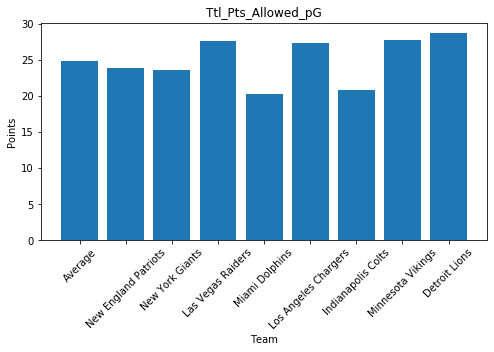

In [141]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')




## Defense

In [43]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [44]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
2TM,0,0,0,0,0,105,411,2,49,39,256,1,1,0,3,104.20
ARI,241,353,2644,19,8,306,1577,16,332,240,2641,18,11,4,34,911.60
ATL,255,389,2978,15,7,273,1011,11,376,255,2978,15,6,2,26,854.50
BAL,176,278,1957,15,7,326,1605,11,270,177,1972,15,11,5,27,734.50
BUF,253,370,2905,22,7,247,976,9,355,253,2905,22,7,6,31,885.80


In [45]:
ttl_offense.reset_index(inplace=True)

In [46]:
team_names = pd.read_pickle('long_names')
ttl_offense = pd.merge(ttl_offense, team_names, on = 'Team')

In [47]:
num_games = defense[['Team', 'GP']]
num_games.head(3)

,Team,GP
0,Pittsburgh Steelers,10
1,Los Angeles Rams,10
2,Baltimore Ravens,10


In [48]:
ttl_offense = pd.merge(ttl_offense, num_games, left_on = 'Long_Name', right_on = 'Team')
ttl_offense.drop(columns=['Team_y'], inplace = True)
ttl_offense.rename(columns = {'Team_x': 'Team'}, inplace = True)
ttl_offense = ttl_offense[['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 
                           'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 
                           'Receptions', 'ReceivingYds', 'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 
                           'FDFantasyPts']]

ttl_offense['Ttl_Turnovers'] = ttl_offense['Interceptions'] + ttl_offense['LostFumbles']
ttl_offense.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers
0,ARI,Arizona Cardinals,10,241,353,2644,19,8,306,1577,16,332,240,2641,18,11,4,34,911.60,12
1,ATL,Atlanta Falcons,10,255,389,2978,15,7,273,1011,11,376,255,2978,15,6,2,26,854.50,9
2,BAL,Baltimore Ravens,10,176,278,1957,15,7,326,1605,11,270,177,1972,15,11,5,27,734.50,12
3,BUF,Buffalo Bills,10,253,370,2905,22,7,247,976,9,355,253,2905,22,7,6,31,885.80,13
4,CAR,Carolina Panthers,11,265,373,2825,14,9,272,1139,13,358,266,2853,14,7,3,27,852.20,12


In [49]:
per_week_stats(ttl_offense, 'CompletedPasses', 'GP')
per_week_stats(ttl_offense, 'PassesAttempted', 'GP')
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'PassingYds', 'GP')
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'RushingAttempts', 'GP')
per_week_stats(ttl_offense, 'RushingYds', 'GP')
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
ttl_offense['Ttl_Yds'] = ttl_offense['PassingYds_pG'] + ttl_offense['RushingYds_pG']
per_week_stats(ttl_offense, 'Ttl_Turnovers', 'GP')
per_week_stats(ttl_offense, 'TtlTDs', 'GP')

In [50]:
taken_def = ['Baltimore Ravens', 'Buffalo Bills', 'Indianapolis Colts', 'Kansas City Chiefs',  'Los Angeles Rams',
             'Miami Dolphins', 'Minnesota Vikings', 'New England Patriots', 'New Orleans Saints', 'Pittsburgh Steelers',
             'San Francisco 49ers', 'Tampa Bay Buccaneers']

In [51]:
taken_off = ['Pittsburgh Steelers', 'Los Angeles Chargers', 'Tennessee Titans', 'Tampa Bay Buccaneers', 
             'San Francisco 49ers', 'New York Jets', 'Carolina Panthers', 'Arizona Cardinals', 'Denver Broncos', 
             'Baltimore Ravens', 'Los Angeles Rams', 'Kansas City Chiefs']

In [52]:
available_def = defense[~defense['Team'].isin(taken_def)]
available_def.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
5,Chicago Bears,10,209,658,5.20,3401,287,1151,4.00,6,350,6.10,214,11.10,2250,12,34,15,44.10,11,6,5,21,64.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,4.00,12.00,0.00,20.90,340.10,28.70,115.10,0.60,35.00,21.40,0.61,225.00,1.20,1.80,1.10,0.50,2.10,6.40
8,Washington Football Team,10,227,619,5.10,3158,279,1204,4.30,9,308,5.70,197,11.00,1954,15,28,15,53.60,11,9,2,32,64.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,5.00,0.00,12.00,22.70,315.80,27.90,120.40,0.90,30.80,19.70,0.64,195.40,1.50,2.40,1.10,0.20,3.20,6.40
10,New York Giants,10,236,642,5.60,3586,255,1009,4.00,10,362,6.70,247,11.20,2577,15,37,20,54.10,15,8,7,25,67.00,4.00,9.00,-2.00,5.00,11.00,14.00,5.00,4.00,13.00,4.00,0.00,23.60,358.60,25.50,100.90,1.00,36.20,24.70,0.68,257.70,1.50,2.50,1.50,0.70,2.50,6.70
12,Arizona Cardinals,10,238,671,5.50,3677,269,1247,4.60,6,377,6.00,247,10.60,2430,19,35,18,51.40,12,8,4,25,54.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,2.00,3.00,2.00,23.80,367.70,26.90,124.70,0.60,37.70,24.70,0.66,243.00,1.90,2.50,1.20,0.40,2.50,5.40
14,Philadelphia Eagles,10,254,677,5.10,3427,315,1334,4.20,15,328,5.80,217,10.80,2093,13,32,21,65.60,11,3,8,34,69.00,3.00,-1.00,8.00,18.00,-1.00,2.00,9.00,20.00,0.00,3.00,8.00,25.40,342.70,31.50,133.40,1.50,32.80,21.70,0.66,209.30,1.30,2.80,1.10,0.80,3.40,6.90


In [53]:
scaled_def = available_def[['Team', 'GP', 'Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 
                            'Completions', 'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG',
                            'Ttl_Turnovers_pG']]

def_columns = ['Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 'Completions', 
               'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG', 'Ttl_Turnovers_pG']

scale_data(scaled_def, def_columns)

In [54]:
scaled_def['Combined_Score'] = (scaled_def['Sacks_pG'] + scaled_def['Ttl_Turnovers_pG'] - 
                                scaled_def['Ttl_Pts_Allowed_pG'] - scaled_def['Ttl_Yds_pG'] -
                                scaled_def['Rushing_Att_pG'] - scaled_def['Rushing_Yds_pG'] - 
                                scaled_def['Completions'] - scaled_def['Completion_Percent_Allowed'] - 
                                scaled_def['Passing_Yds_pG'] - scaled_def['Passing_TDs'])

scaled_def.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_def.head()

,Team,GP,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Completions,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs,Sacks_pG,Ttl_Turnovers_pG,Combined_Score
8,Washington Football Team,10,-1.50,-1.93,0.11,-0.06,-1.61,-0.81,-1.75,-1.00,1.73,-0.09,10.18
5,Chicago Bears,10,-2.20,-1.13,0.45,-0.38,-0.97,-1.78,-0.85,-1.96,0.15,-0.09,8.88
10,New York Giants,10,-1.15,-0.52,-0.91,-1.25,0.28,0.66,0.14,-1.00,0.72,1.43,5.90
17,Cleveland Browns,10,-0.18,-0.71,-0.62,-1.00,0.32,-0.06,-0.16,0.61,1.01,2.19,4.99
14,Philadelphia Eagles,10,-0.45,-1.04,1.65,0.73,-0.85,-0.05,-1.33,-1.64,2.02,-0.09,4.92


In [55]:
available_off = ttl_offense[~ttl_offense['Long_Name'].isin(taken_off)]
available_off.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
1,ATL,Atlanta Falcons,10,255,389,2978,15,7,273,1011,11,376,255,2978,15,6,2,26,854.50,9,25.50,38.90,0.66,297.80,7.66,27.30,101.10,3.70,398.90,0.90,2.60
3,BUF,Buffalo Bills,10,253,370,2905,22,7,247,976,9,355,253,2905,22,7,6,31,885.80,13,25.30,37.00,0.68,290.50,7.85,24.70,97.60,3.95,388.10,1.30,3.10
5,CHI,Chicago Bears,10,254,402,2430,16,11,216,771,2,387,253,2426,16,9,2,19,708.40,13,25.40,40.20,0.63,243.00,6.04,21.60,77.10,3.57,320.10,1.30,1.90
6,CIN,Cincinnati Bengals,10,268,415,2734,13,6,255,980,9,403,268,2734,13,14,8,22,776.70,14,26.80,41.50,0.65,273.40,6.59,25.50,98.00,3.84,371.40,1.40,2.20
7,CLE,Cleveland Browns,10,169,278,1970,16,7,318,1570,10,258,169,1970,16,7,3,26,726.20,10,16.90,27.80,0.61,197.00,7.09,31.80,157.00,4.94,354.00,1.00,2.60


In [60]:
def_team1 = 8 # Washington Football Team
def_team2 = 5 # Chicago Bears
def_team3 = 10 # New York Giants
def_team4 = 17 # Cleveland Browns
def_team5 = 14 # Philadelphia Eagles

Week 12 Opponents:
    

In [56]:
off_opp = ['DAL', 'GNB', 'CIN', 'JAX', 'SEA']

In [57]:
ttl_offense[ttl_offense['Team'].isin(off_opp)]

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
6,CIN,Cincinnati Bengals,10,268,415,2734,13,6,255,980,9,403,268,2734,13,14,8,22,776.70,14,26.80,41.50,0.65,273.40,6.59,25.50,98.00,3.84,371.40,1.40,2.20
8,DAL,Dallas Cowboys,10,270,421,2984,15,9,274,1167,10,410,270,2984,15,17,12,25,856.40,21,27.00,42.10,0.64,298.40,7.09,27.40,116.70,4.26,415.10,2.10,2.50
11,GNB,Green Bay Packers,10,240,352,2889,29,4,265,1159,8,334,240,2889,29,8,5,37,969.60,9,24.00,35.20,0.68,288.90,8.21,26.50,115.90,4.37,404.80,0.90,3.70
14,JAX,Jacksonville Jaguars,10,236,377,2479,15,11,217,973,7,357,236,2479,15,9,5,23,745.60,16,23.60,37.70,0.63,247.90,6.58,21.70,97.30,4.48,345.20,1.60,2.30
27,SEA,Seattle Seahawks,10,256,362,2986,30,10,246,1213,10,347,256,2986,30,9,4,40,1013.30,14,25.60,36.20,0.71,298.60,8.25,24.60,121.30,4.93,419.90,1.40,4.00


In [58]:
off_team1 = 8
off_team2 = 11
off_team3 = 6
off_team4 = 14
off_team5 = 27

#### Defense Comparisons

Defense

Avg Ttl_Yds_pG: 374.44
Washington Football Team Ttl_Yds_pG: 315.8
--------------------------------------------------
Avg Ttl_Yds_pG: 374.44
Chicago Bears Ttl_Yds_pG: 340.1
--------------------------------------------------
Avg Ttl_Yds_pG: 374.44
New York Giants Ttl_Yds_pG: 358.6
--------------------------------------------------
Avg Ttl_Yds_pG: 374.44
Cleveland Browns Ttl_Yds_pG: 352.9
--------------------------------------------------
Avg Ttl_Yds_pG: 374.44
Philadelphia Eagles Ttl_Yds_pG: 342.7
--------------------------------------------------


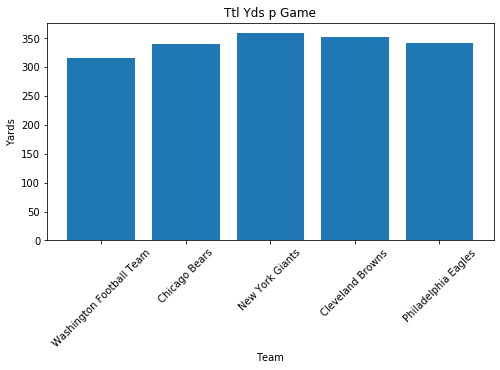

----------------------------------------
Offense

Avg Ttl_Yds: 370.62
DAL Ttl_Yds: 415.1
--------------------------------------------------
Avg Ttl_Yds: 370.62
GNB Ttl_Yds: 404.8
--------------------------------------------------
Avg Ttl_Yds: 370.62
CIN Ttl_Yds: 371.4
--------------------------------------------------
Avg Ttl_Yds: 370.62
JAX Ttl_Yds: 345.2
--------------------------------------------------
Avg Ttl_Yds: 370.62
SEA Ttl_Yds: 419.9
--------------------------------------------------


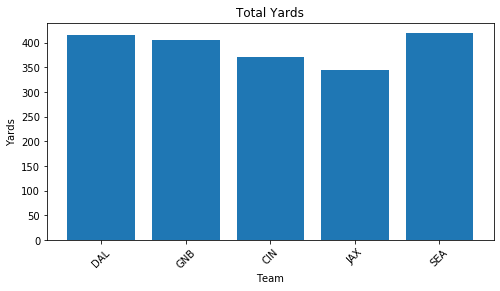

In [61]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Yds p Game", "Team", "Yards")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'Ttl_Yds', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Yds', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Yds', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Yds', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Yds', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Yards", "Team", "Yards")

Defense

Avg Ttl_Turnovers_pG: 1.12
Washington Football Team Ttl_Turnovers_pG: 1.1
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.12
Chicago Bears Ttl_Turnovers_pG: 1.1
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.12
New York Giants Ttl_Turnovers_pG: 1.5
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.12
Cleveland Browns Ttl_Turnovers_pG: 1.7
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.12
Philadelphia Eagles Ttl_Turnovers_pG: 1.1
--------------------------------------------------


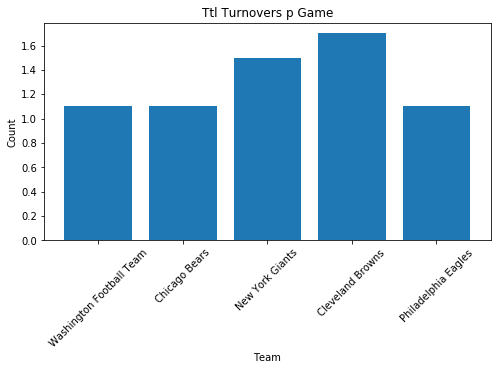

----------------------------------------
Offense

Avg Ttl_Turnovers_pG: 1.3
DAL Ttl_Turnovers_pG: 2.1
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.3
GNB Ttl_Turnovers_pG: 0.9
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.3
CIN Ttl_Turnovers_pG: 1.4
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.3
JAX Ttl_Turnovers_pG: 1.6
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.3
SEA Ttl_Turnovers_pG: 1.4
--------------------------------------------------


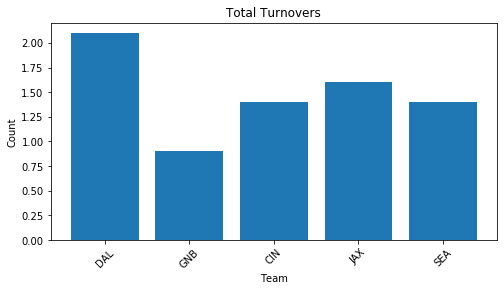

In [62]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Turnovers p Game", "Team", "Count")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Turnovers", "Team", "Count")

Defense

Avg Ttl_TDs_pG: 2.93
Washington Football Team Ttl_TDs_pG: 2.4
--------------------------------------------------
Avg Ttl_TDs_pG: 2.93
Chicago Bears Ttl_TDs_pG: 1.8
--------------------------------------------------
Avg Ttl_TDs_pG: 2.93
New York Giants Ttl_TDs_pG: 2.5
--------------------------------------------------
Avg Ttl_TDs_pG: 2.93
Cleveland Browns Ttl_TDs_pG: 2.9
--------------------------------------------------
Avg Ttl_TDs_pG: 2.93
Philadelphia Eagles Ttl_TDs_pG: 2.8
--------------------------------------------------


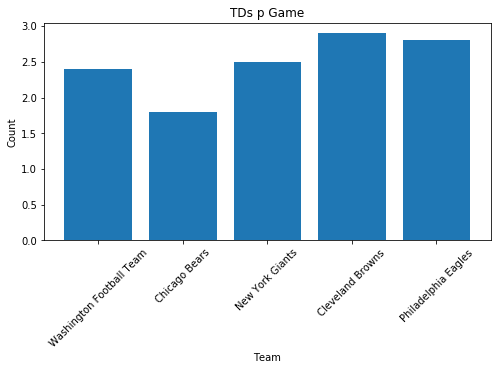

----------------------------------------
Offense

Avg TtlTDs_pG: 2.67
DAL TtlTDs_pG: 2.5
--------------------------------------------------
Avg TtlTDs_pG: 2.67
GNB TtlTDs_pG: 3.7
--------------------------------------------------
Avg TtlTDs_pG: 2.67
CIN TtlTDs_pG: 2.2
--------------------------------------------------
Avg TtlTDs_pG: 2.67
JAX TtlTDs_pG: 2.3
--------------------------------------------------
Avg TtlTDs_pG: 2.67
SEA TtlTDs_pG: 4.0
--------------------------------------------------


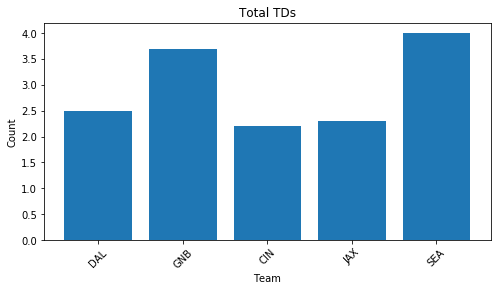

In [63]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "TDs p Game", "Team", "Count")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'TtlTDs_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'TtlTDs_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'TtlTDs_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'TtlTDs_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'TtlTDs_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total TDs", "Team", "Count")

#### Additional Defense Stats

Avg Sacks_pG: 2.0
Washington Football Team Sacks_pG: 3.2
--------------------------------------------------
Avg Sacks_pG: 2.0
Chicago Bears Sacks_pG: 2.1
--------------------------------------------------
Avg Sacks_pG: 2.0
New York Giants Sacks_pG: 2.5
--------------------------------------------------
Avg Sacks_pG: 2.0
Cleveland Browns Sacks_pG: 2.7
--------------------------------------------------
Avg Sacks_pG: 2.0
Philadelphia Eagles Sacks_pG: 3.4
--------------------------------------------------


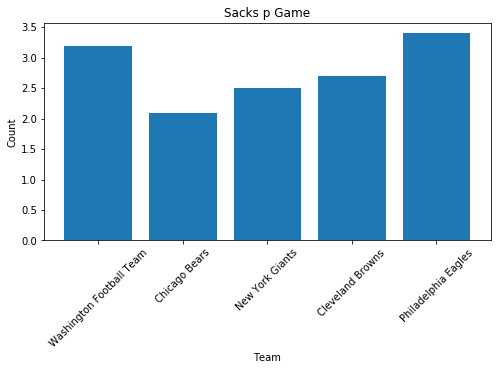

In [64]:
average, def1, _1def = print_metric_team(available_def, 'Sacks_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Sacks_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Sacks_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Sacks_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Sacks_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Sacks p Game", "Team", "Count")



## Kicking

In [73]:
available_kickers = kicking_df[~kicking_df['PLAYER'].isin(taken_k)]
available_kickers.head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11
0,Ryan Succop,K,TB,11,23,91.30,50,0-0,6-6,8-8,6-7,1-2,35,94.30,96,104.00,5.00,7.00,9.00,8.00,14.00,10.00,9.00,15.00,4.00,17.00,6.00
2,Daniel Carlson,K,LV,10,23,91.30,54,0-0,9-9,6-6,2-4,4-4,32,96.90,94,104.00,12.00,12.00,8.00,13.00,11.00,0.00,9.00,10.00,7.00,15.00,7.00
4,Younghoe Koo,K,ATL,9,25,96.00,54,0-0,6-6,6-6,7-8,5-5,21,85.70,90,107.00,9.00,17.00,8.00,0.00,13.00,20.00,2.00,13.00,12.00,0.00,13.00
5,Jason Sanders,K,MIA,10,23,95.70,56,0-0,5-5,3-3,8-9,6-6,24,100.00,90,110.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00,4.00,14.00,14.00,10.00
7,Tyler Bass,K,BUF,10,25,76.00,58,1-1,4-4,4-7,6-7,4-6,30,96.70,86,100.00,9.00,7.00,5.00,6.00,5.00,6.00,23.00,6.00,15.00,18.00,0.00


In [74]:
available_kickers.rename(columns={'PLAYER': 'Player'}, inplace=True)

In [75]:
available_kickers['FG_1_19'] = available_kickers['_1_19'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_20_29'] = available_kickers['_20_29'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_30_39'] = available_kickers['_30_39'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_40_49'] = available_kickers['_40_49'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_OVER50'] = available_kickers['OVER50'].map(lambda x: int(x.split('-')[0]))

In [76]:
available_kickers.sort_values('OVER50', ascending = False).head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
12,Brandon McManus,K,DEN,10,21,95.20,56,0-0,4-4,2-2,8-8,6-7,19,94.70,78,98.00,2.00,8.00,6.00,18.00,0.00,24.00,5.00,7.00,11.00,8.00,9.00,0,4,2,8,6
19,Stephen Gostkowski,K,TEN,10,23,65.20,55,0-0,2-3,3-4,4-9,6-7,28,92.90,71,87.00,4.00,12.00,25.00,0.00,6.00,4.00,8.00,2.00,7.00,7.00,12.00,0,2,3,4,6
5,Jason Sanders,K,MIA,10,23,95.70,56,0-0,5-5,3-3,8-9,6-6,24,100.00,90,110.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00,4.00,14.00,14.00,10.00,0,5,3,8,6
4,Younghoe Koo,K,ATL,9,25,96.00,54,0-0,6-6,6-6,7-8,5-5,21,85.70,90,107.00,9.00,17.00,8.00,0.00,13.00,20.00,2.00,13.00,12.00,0.00,13.00,0,6,6,7,5
15,Matt Prater,K,DET,10,24,70.80,59,0-0,3-3,6-6,4-7,4-8,24,100.00,75,87.00,12.00,3.00,14.00,3.00,0.00,11.00,16.00,3.00,9.00,16.00,0.00,0,3,6,4,4


In [77]:
scaled_k = available_kickers[['Player', 'POSITION', 'TEAM', 'GP', 'FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS',
                              'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']]

k_columns = ['FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS', 'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']

scale_data(scaled_k, k_columns)

scaled_k.head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
0,Ryan Succop,K,TB,11,1.13,0.52,0.23,1.45,0.26,1.39,-0.25,1.70,1.86,0.87,-0.49
2,Daniel Carlson,K,LV,10,1.13,0.52,0.46,1.20,0.39,1.33,-0.25,3.11,1.03,-0.55,1.12
4,Younghoe Koo,K,ATL,9,1.36,0.70,0.46,0.27,-0.18,1.21,-0.25,1.70,1.03,1.22,1.65
5,Jason Sanders,K,MIA,10,1.13,0.69,0.58,0.53,0.55,1.21,-0.25,1.22,-0.21,1.58,2.19
7,Tyler Bass,K,BUF,10,1.36,-0.04,0.70,1.03,0.38,1.08,4.00,0.75,0.21,0.87,1.12


In [78]:
scaled_k['Combined_Score'] = (scaled_k['FGM_A'] + scaled_k['FG%'] + scaled_k['LNG'] + 
                              scaled_k['XPM_A'] + scaled_k['XP%'] + scaled_k['PTS'] + 
                              scaled_k['FG_1_19'] + scaled_k['FG_20_29'] + scaled_k['FG_30_39'] + 
                              scaled_k['FG_40_49'] + scaled_k['FG_OVER50'])

scaled_k.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_k.head(10)

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50,Combined_Score
7,Tyler Bass,K,BUF,10,1.36,-0.04,0.70,1.03,0.38,1.08,4.00,0.75,0.21,0.87,1.12,11.45
2,Daniel Carlson,K,LV,10,1.13,0.52,0.46,1.20,0.39,1.33,-0.25,3.11,1.03,-0.55,1.12,9.49
5,Jason Sanders,K,MIA,10,1.13,0.69,0.58,0.53,0.55,1.21,-0.25,1.22,-0.21,1.58,2.19,9.21
4,Younghoe Koo,K,ATL,9,1.36,0.70,0.46,0.27,-0.18,1.21,-0.25,1.70,1.03,1.22,1.65,9.18
0,Ryan Succop,K,TB,11,1.13,0.52,0.23,1.45,0.26,1.39,-0.25,1.70,1.86,0.87,-0.49,8.66
16,Mason Crosby,K,GB,10,-0.06,0.85,0.40,1.53,0.40,0.71,4.00,-0.67,0.62,0.16,0.05,8.00
10,Graham Gano,K,NYG,10,1.01,0.68,0.52,-0.15,0.55,0.87,-0.25,0.75,1.86,0.51,1.12,7.47
12,Brandon McManus,K,DEN,10,0.89,0.67,0.58,0.11,0.28,0.84,-0.25,0.75,-0.62,1.58,2.19,7.00
9,Randy Bullock,K,CIN,10,1.24,0.23,0.52,0.36,0.32,0.93,-0.25,0.28,1.86,0.87,0.58,6.94
15,Matt Prater,K,DET,10,1.24,-0.24,0.76,0.53,0.55,0.74,-0.25,0.28,1.03,0.16,1.12,5.92


In [79]:
kicker1 = 7
kicker2 = 2
kicker3 = 5
kicker4 = 4
kicker5 = 0

Week 12 Opponents:
    
    Buffalo Bills vs Los Angeles Chargers
    Las Vegas Raiders vs Atlanta Falcons
    Miami Dolphins vs New York Jets
    Atlanta Falcons vs Las Vegas Raiders
    Tampa Bay Buccaneers vs Kansas City Chiefs

In [80]:
kicking_opponents = ['Los Angeles Chargers', 'Atlanta Falcons', 'New York Jets', 'Las Vegas Raiders', 
                     'Kansas City Chiefs']

In [81]:
kicking_defense = defense[defense['Team'].isin(kicking_opponents)]
kicking_defense['Ttl_TDs'] = kicking_defense['Rushing_TDs']+kicking_defense['Passing_TDs']
kicking_defense['Points_from_Kicking'] = kicking_defense['Ttl_Pts_Allowed']-(kicking_defense['Ttl_TDs']*7)
kicking_defense['Num_Field_Goals_Allowed'] = kicking_defense['Points_from_Kicking']/3
kicking_defense

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG,Ttl_TDs,Points_from_Kicking,Num_Field_Goals_Allowed
6,Kansas City Chiefs,10,214,646,5.50,3551,288,1335,4.60,10,339,6.20,215,10.80,2216,14,29,22,75.90,15,10,5,19,74.00,7.00,5.00,7.00,20.00,-1.00,3.00,18.00,7.00,1.00,0.00,1.00,21.40,355.10,28.80,133.50,1.00,33.90,21.50,0.63,221.60,1.40,2.40,1.50,0.50,1.90,7.40,24,46,15.33
23,Los Angeles Chargers,10,273,616,5.60,3440,248,1153,4.60,10,351,6.20,218,10.90,2287,20,33,20,60.60,9,5,4,17,43.00,11.00,1.00,2.00,4.00,3.00,0.00,8.00,3.00,2.00,1.00,8.00,27.30,344.00,24.80,115.30,1.00,35.10,21.80,0.62,228.70,2.00,3.00,0.90,0.40,1.70,4.30,30,63,21.00
24,Atlanta Falcons,10,275,634,6.40,4068,243,1065,4.40,11,374,7.70,256,12.30,3003,22,33,25,75.80,11,7,4,17,30.00,-1.00,3.00,5.00,0.00,0.00,7.00,2.00,6.00,3.00,0.00,5.00,27.50,406.80,24.30,106.50,1.10,37.40,25.60,0.68,300.30,2.20,3.30,1.10,0.40,1.70,3.00,33,44,14.67
25,Las Vegas Raiders,10,276,648,6.00,3858,255,1122,4.40,16,382,7.00,242,11.60,2736,16,41,27,65.90,11,8,3,11,32.00,0.00,2.00,3.00,0.00,4.00,0.00,-4.00,9.00,4.00,16.00,-2.00,27.60,385.80,25.50,112.20,1.60,38.20,24.20,0.63,273.60,1.60,3.20,1.10,0.30,1.10,3.20,32,52,17.33
30,New York Jets,10,302,676,5.90,4000,293,1117,3.80,12,369,7.50,269,11.00,2883,19,40,21,52.50,11,7,4,14,35.00,7.00,4.00,0.00,8.00,2.00,6.00,5.00,-4.00,-1.00,0.00,8.00,30.20,400.00,29.30,111.70,1.20,36.90,26.90,0.73,288.30,1.90,3.10,1.10,0.40,1.40,3.50,31,85,28.33


In [82]:
kick_def1 = 23
kick_def2 = 24
kick_def3 = 30
kick_def4 = 25
kick_def5 = 6

#### Kicking Comparison

Kickers

Avg FGM_A: 13.47
Tyler Bass FGM_A: 25
--------------------------------------------------
Avg FGM_A: 13.47
Daniel Carlson FGM_A: 23
--------------------------------------------------
Avg FGM_A: 13.47
Jason Sanders FGM_A: 23
--------------------------------------------------
Avg FGM_A: 13.47
Younghoe Koo FGM_A: 25
--------------------------------------------------
Avg FGM_A: 13.47
Ryan Succop FGM_A: 23
--------------------------------------------------


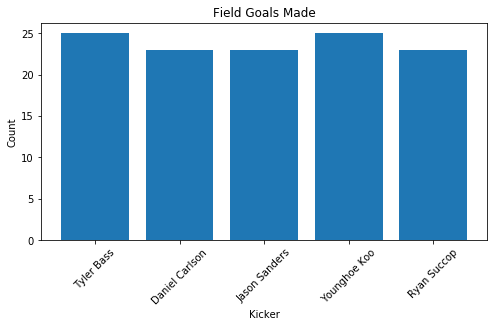

----------------------------------------
Defense

Avg Num_Field_Goals_Allowed: 19.33
Los Angeles Chargers Num_Field_Goals_Allowed: 21.0
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 19.33
Atlanta Falcons Num_Field_Goals_Allowed: 14.67
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 19.33
New York Jets Num_Field_Goals_Allowed: 28.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 19.33
Las Vegas Raiders Num_Field_Goals_Allowed: 17.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 19.33
Kansas City Chiefs Num_Field_Goals_Allowed: 15.33
--------------------------------------------------


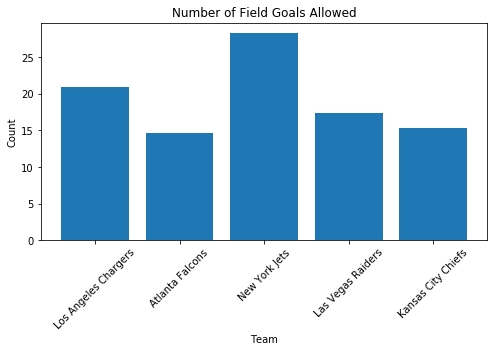

In [83]:
print('Kickers')
print('')
average, kick1, _1kick = print_metric(available_kickers, 'FGM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FGM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FGM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FGM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FGM_A', kicker5)

x = [kick1, kick2, kick3, kick4, kick5]
y = [_1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goals Made', 'Kicker', 'Count')

print('-'*40)
print('Defense')
print('')

average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Number of Field Goals Allowed', 'Team', 'Count')

Kickers

Avg XPM_A: 17.74
Tyler Bass XPM_A: 30
--------------------------------------------------
Avg XPM_A: 17.74
Daniel Carlson XPM_A: 32
--------------------------------------------------
Avg XPM_A: 17.74
Jason Sanders XPM_A: 24
--------------------------------------------------
Avg XPM_A: 17.74
Younghoe Koo XPM_A: 21
--------------------------------------------------
Avg XPM_A: 17.74
Ryan Succop XPM_A: 35
--------------------------------------------------


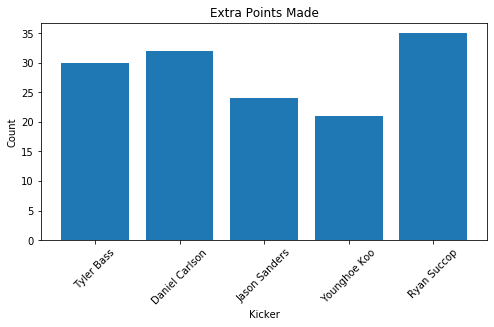

----------------------------------------
Defense

Avg Ttl_TDs: 30.0
Los Angeles Chargers Ttl_TDs: 30
--------------------------------------------------
Avg Ttl_TDs: 30.0
Atlanta Falcons Ttl_TDs: 33
--------------------------------------------------
Avg Ttl_TDs: 30.0
New York Jets Ttl_TDs: 31
--------------------------------------------------
Avg Ttl_TDs: 30.0
Las Vegas Raiders Ttl_TDs: 32
--------------------------------------------------
Avg Ttl_TDs: 30.0
Kansas City Chiefs Ttl_TDs: 24
--------------------------------------------------


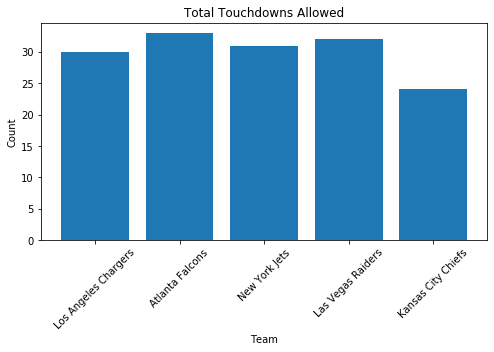

In [85]:
print('Kickers')
print('')
average, kick1, _1kick = print_metric(available_kickers, 'XPM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XPM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XPM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XPM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XPM_A', kicker5)

x = [kick1, kick2, kick3, kick4, kick5]
y = [_1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Count')

print('-'*40)
print('Defense')
print('')

average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Total Touchdowns Allowed', 'Team', 'Count')

#### Additional Kicker Analysis

Avg FG%: 77.21
Tyler Bass FG%: 76.0
--------------------------------------------------
Avg FG%: 77.21
Daniel Carlson FG%: 91.3
--------------------------------------------------
Avg FG%: 77.21
Jason Sanders FG%: 95.7
--------------------------------------------------
Avg FG%: 77.21
Younghoe Koo FG%: 96.0
--------------------------------------------------
Avg FG%: 77.21
Ryan Succop FG%: 91.3
--------------------------------------------------


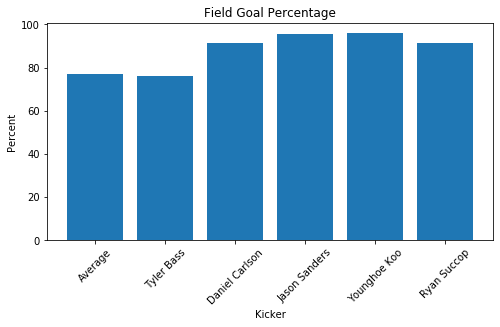

In [86]:
average, kick1, _1kick = print_metric(available_kickers, 'FG%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FG%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FG%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FG%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FG%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goal Percentage', 'Kicker', 'Percent')

Avg XP%: 89.27
Tyler Bass XP%: 96.7
--------------------------------------------------
Avg XP%: 89.27
Daniel Carlson XP%: 96.9
--------------------------------------------------
Avg XP%: 89.27
Jason Sanders XP%: 100.0
--------------------------------------------------
Avg XP%: 89.27
Younghoe Koo XP%: 85.7
--------------------------------------------------
Avg XP%: 89.27
Ryan Succop XP%: 94.3
--------------------------------------------------


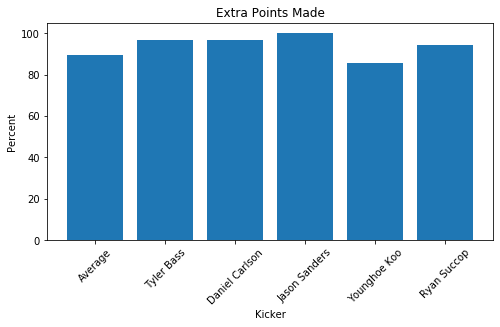

In [87]:
average, kick1, _1kick = print_metric(available_kickers, 'XP%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XP%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XP%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XP%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XP%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Percent')

#### Additional Defense Analysis

Avg RZ_Percent: 66.14
Los Angeles Chargers RZ_Percent: 60.6
--------------------------------------------------
Avg RZ_Percent: 66.14
Atlanta Falcons RZ_Percent: 75.8
--------------------------------------------------
Avg RZ_Percent: 66.14
New York Jets RZ_Percent: 52.5
--------------------------------------------------
Avg RZ_Percent: 66.14
Las Vegas Raiders RZ_Percent: 65.9
--------------------------------------------------
Avg RZ_Percent: 66.14
Kansas City Chiefs RZ_Percent: 75.9
--------------------------------------------------


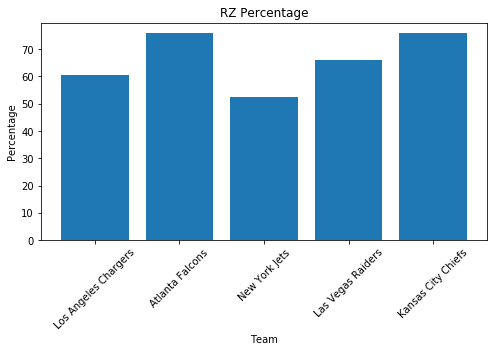

In [88]:
average, kdef1, _1kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'RZ Percentage', 'Team', 'Percentage')